<a href="https://colab.research.google.com/github/pablovanegas/Actividad3/blob/main/Actividad4POO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 4.1 Herencia

In [ ]:
# Ejercicio 4.1 Herencia

class Cuenta:
    def __init__(self, saldo: float, tasa_anual: float):
        self._saldo = saldo
        self._tasa_anual = tasa_anual
        self._num_consignaciones = 0
        self._num_retiros = 0
        self._comision_mensual = 0.0

    def consignar(self, cantidad: float):
        self._saldo += cantidad
        self._num_consignaciones += 1

    def retirar(self, cantidad: float):
        if cantidad <= self._saldo:
            self._saldo -= cantidad
            self._num_retiros += 1
        else:
            print("Fondos insuficientes para realizar el retiro.")

    def calcular_interes_mensual(self):
        interes_mensual = (self._saldo * (self._tasa_anual / 100)) / 12
        self._saldo += interes_mensual

    def extracto_mensual(self):
        self._saldo -= self._comision_mensual
        self.calcular_interes_mensual()

    def imprimir(self):
        print(f"Saldo: {self._saldo:.2f}")
        print(f"Número de consignaciones: {self._num_consignaciones}")
        print(f"Número de retiros: {self._num_retiros}")
        print(f"Comisión mensual: {self._comision_mensual:.2f}")


class CuentaAhorros(Cuenta):
    def __init__(self, saldo: float, tasa_anual: float):
        super().__init__(saldo, tasa_anual)
        self._activa = saldo >= 10000

    def consignar(self, cantidad: float):
        if self._activa:
            super().consignar(cantidad)
        else:
            print("Cuenta inactiva. No se pueden realizar consignaciones.")

    def retirar(self, cantidad: float):
        if self._activa:
            super().retirar(cantidad)
        else:
            print("Cuenta inactiva. No se pueden realizar retiros.")

    def extracto_mensual(self):
        if self._num_retiros > 4:
            self._comision_mensual += (self._num_retiros - 4) * 1000
        super().extracto_mensual()
        self._activa = self._saldo >= 10000

    def imprimir(self):
        super().imprimir()
        print(f"Estado de la cuenta: {'Activa' if self._activa else 'Inactiva'}")
        print(f"Total transacciones: {self._num_consignaciones + self._num_retiros}")


class CuentaCorriente(Cuenta):
    def __init__(self, saldo: float, tasa_anual: float):
        super().__init__(saldo, tasa_anual)
        self._sobregiro = 0.0

    def retirar(self, cantidad: float):
        if cantidad <= self._saldo:
            super().retirar(cantidad)
        else:
            self._sobregiro += (cantidad - self._saldo)
            self._saldo = 0
            self._num_retiros += 1

    def consignar(self, cantidad: float):
        if self._sobregiro > 0:
            diferencia = cantidad - self._sobregiro
            if diferencia > 0:
                self._sobregiro = 0
                super().consignar(diferencia)
            else:
                self._sobregiro -= cantidad
        else:
            super().consignar(cantidad)

    def imprimir(self):
        super().imprimir()
        print(f"Sobregiro: {self._sobregiro:.2f}")
        print(f"Total transacciones: {self._num_consignaciones + self._num_retiros}")


# Método principal
if __name__ == "__main__":
    # Crear una cuenta de ahorros
    cuenta_ahorros = CuentaAhorros(15000, 4.5)
    cuenta_ahorros.consignar(5000)
    cuenta_ahorros.retirar(2000)
    cuenta_ahorros.extracto_mensual()
    cuenta_ahorros.imprimir()

    print("\n")

    # Crear una cuenta corriente
    cuenta_corriente = CuentaCorriente(10000, 4.5)
    cuenta_corriente.retirar(12000)
    cuenta_corriente.consignar(3000)
    cuenta_corriente.extracto_mensual()
    cuenta_corriente.imprimir()


"""
Clase: Cuenta
- _saldo: float
- _tasa_anual: float
- _num_consignaciones: int
- _num_retiros: int
- _comision_mensual: float
+ consignar(cantidad: float)
+ retirar(cantidad: float)
+ calcular_interes_mensual()
+ extracto_mensual()
+ imprimir()

Clase: CuentaAhorros (hereda de Cuenta)
- _activa: bool
+ consignar(cantidad: float)
+ retirar(cantidad: float)
+ extracto_mensual()
+ imprimir()

Clase: CuentaCorriente (hereda de Cuenta)
- _sobregiro: float
+ consignar(cantidad: float)
+ retirar(cantidad: float)
+ imprimir()

"""

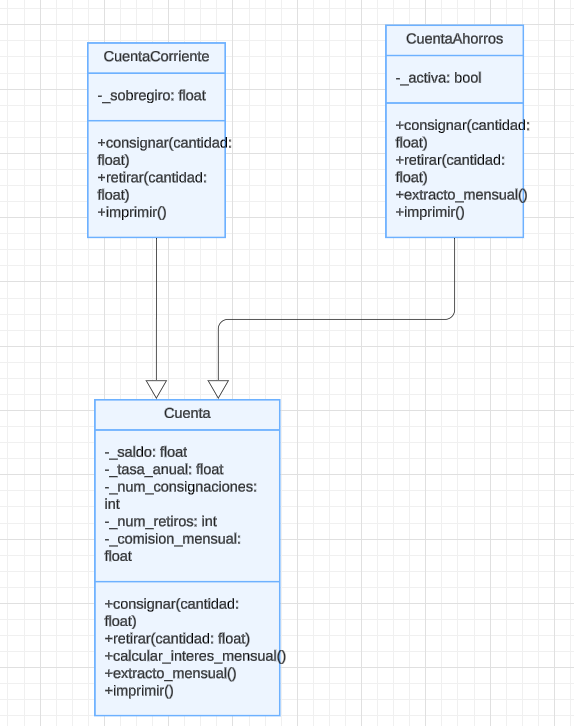

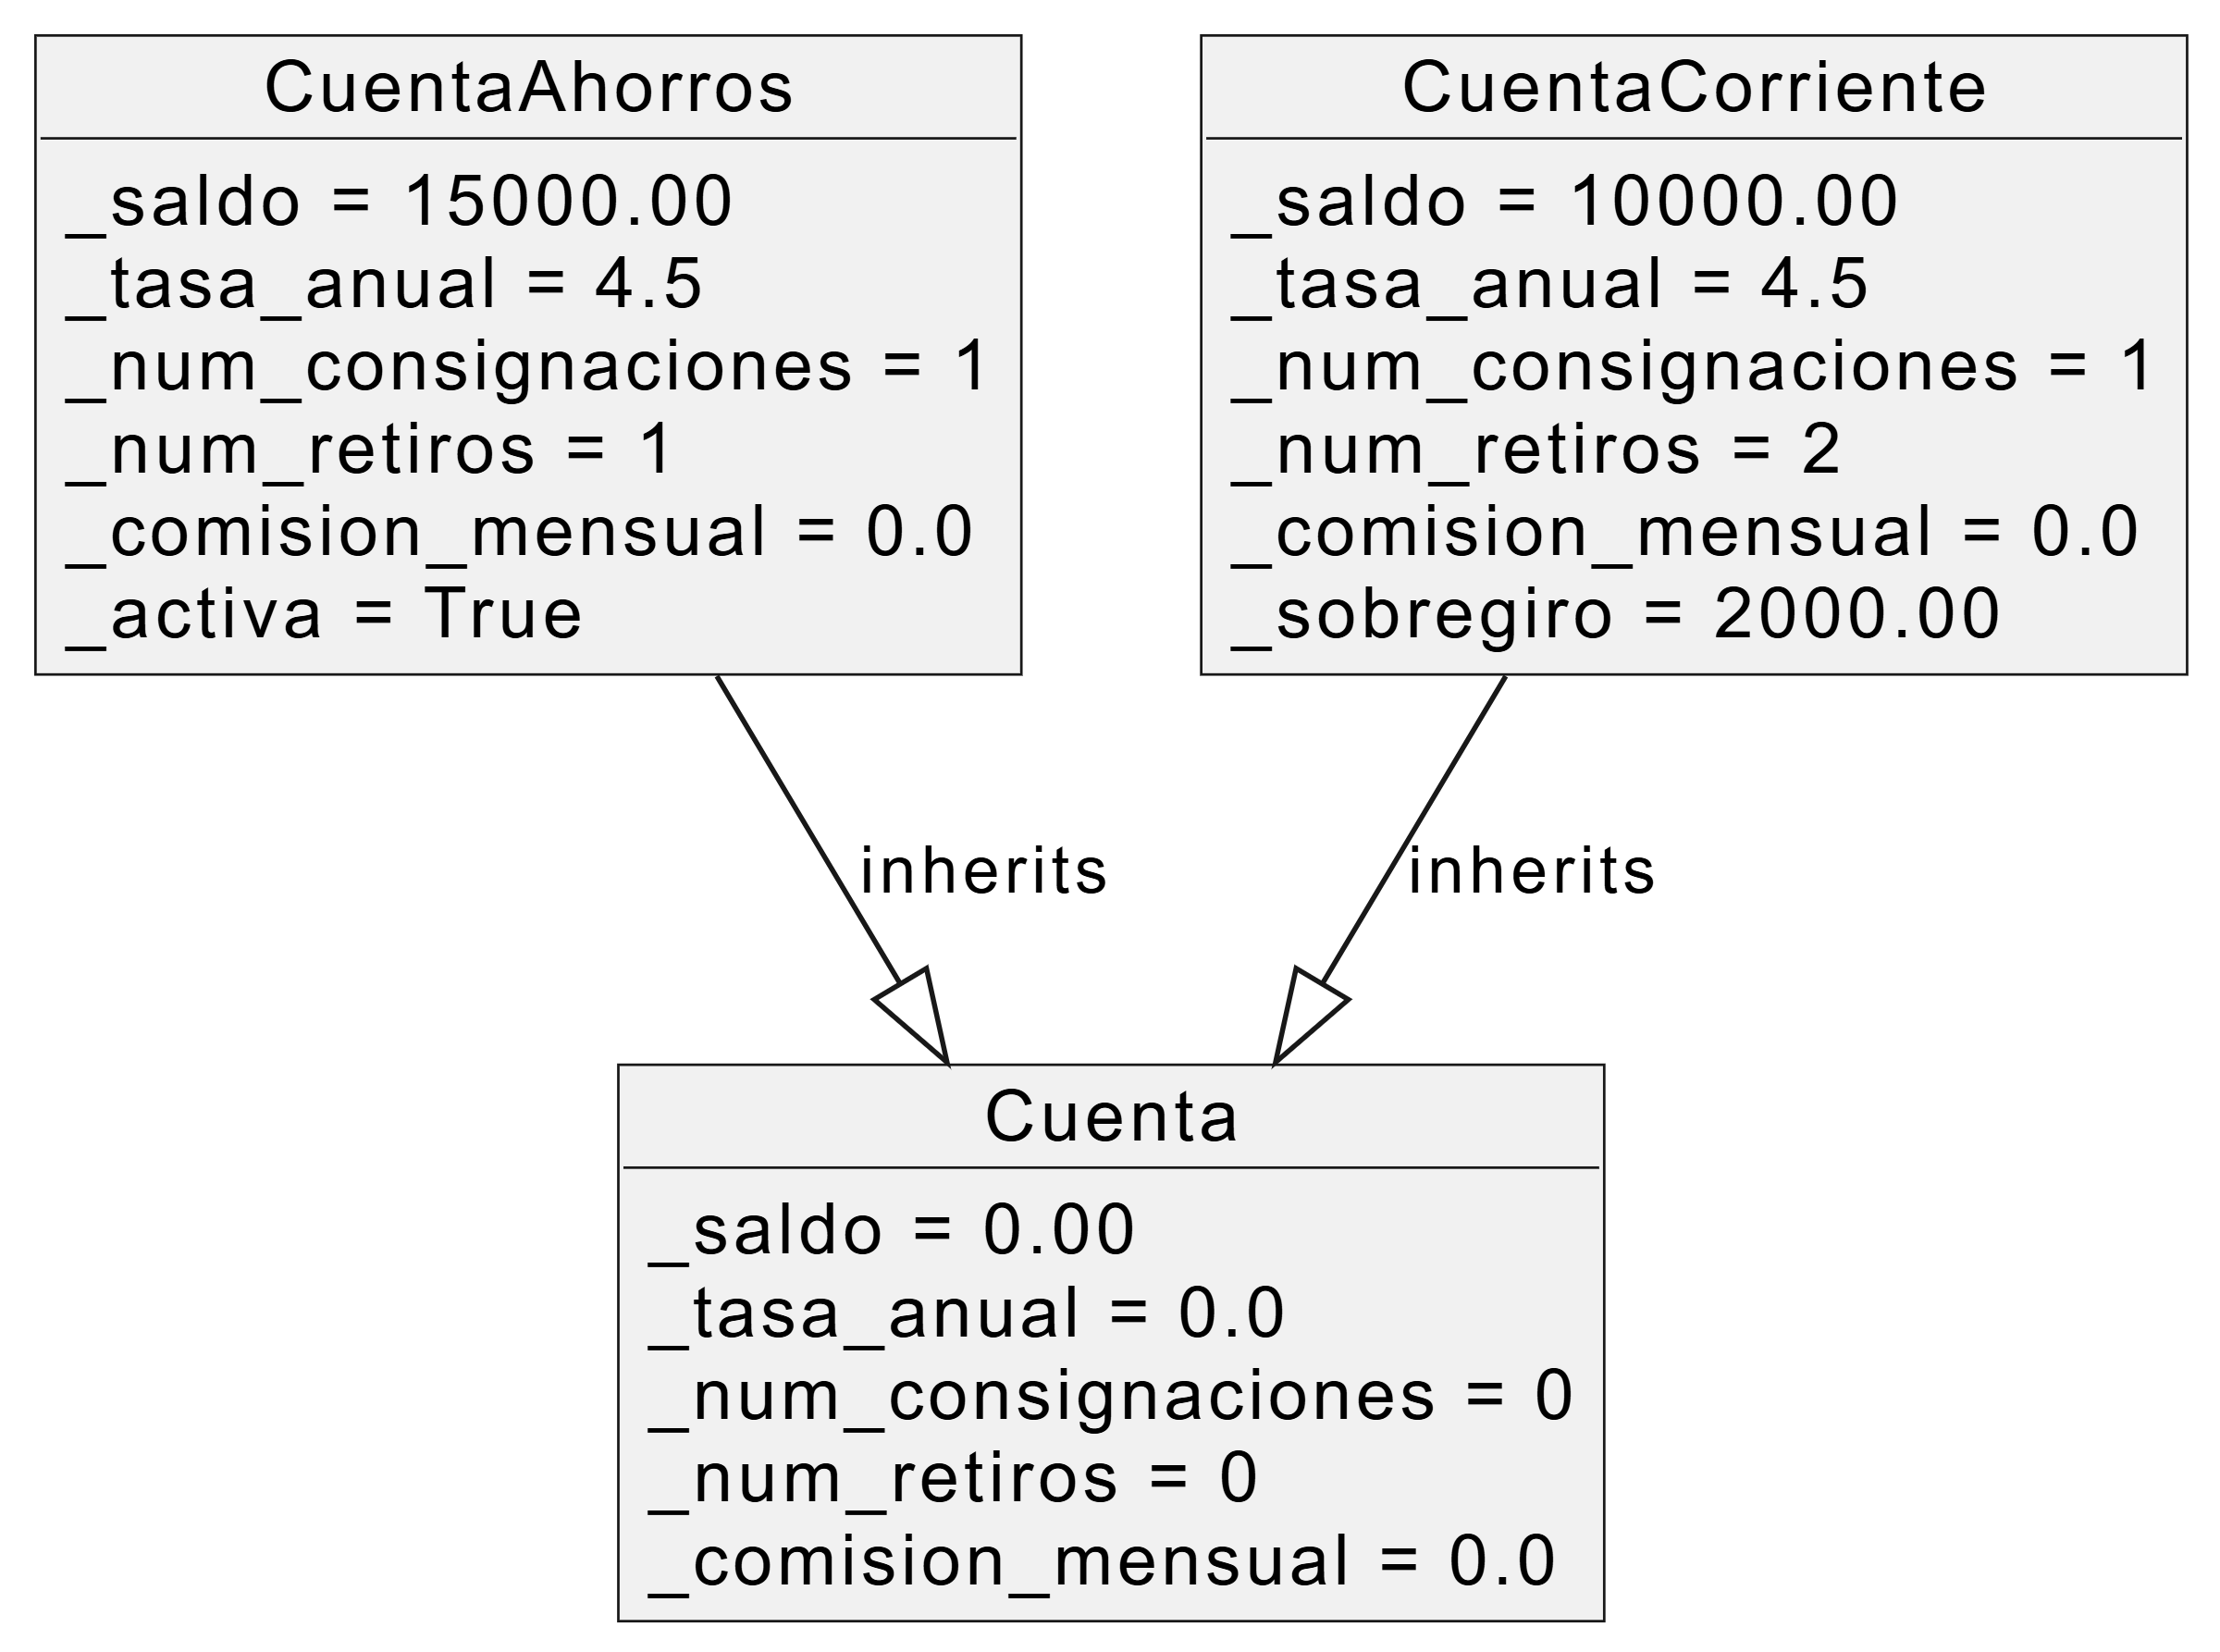

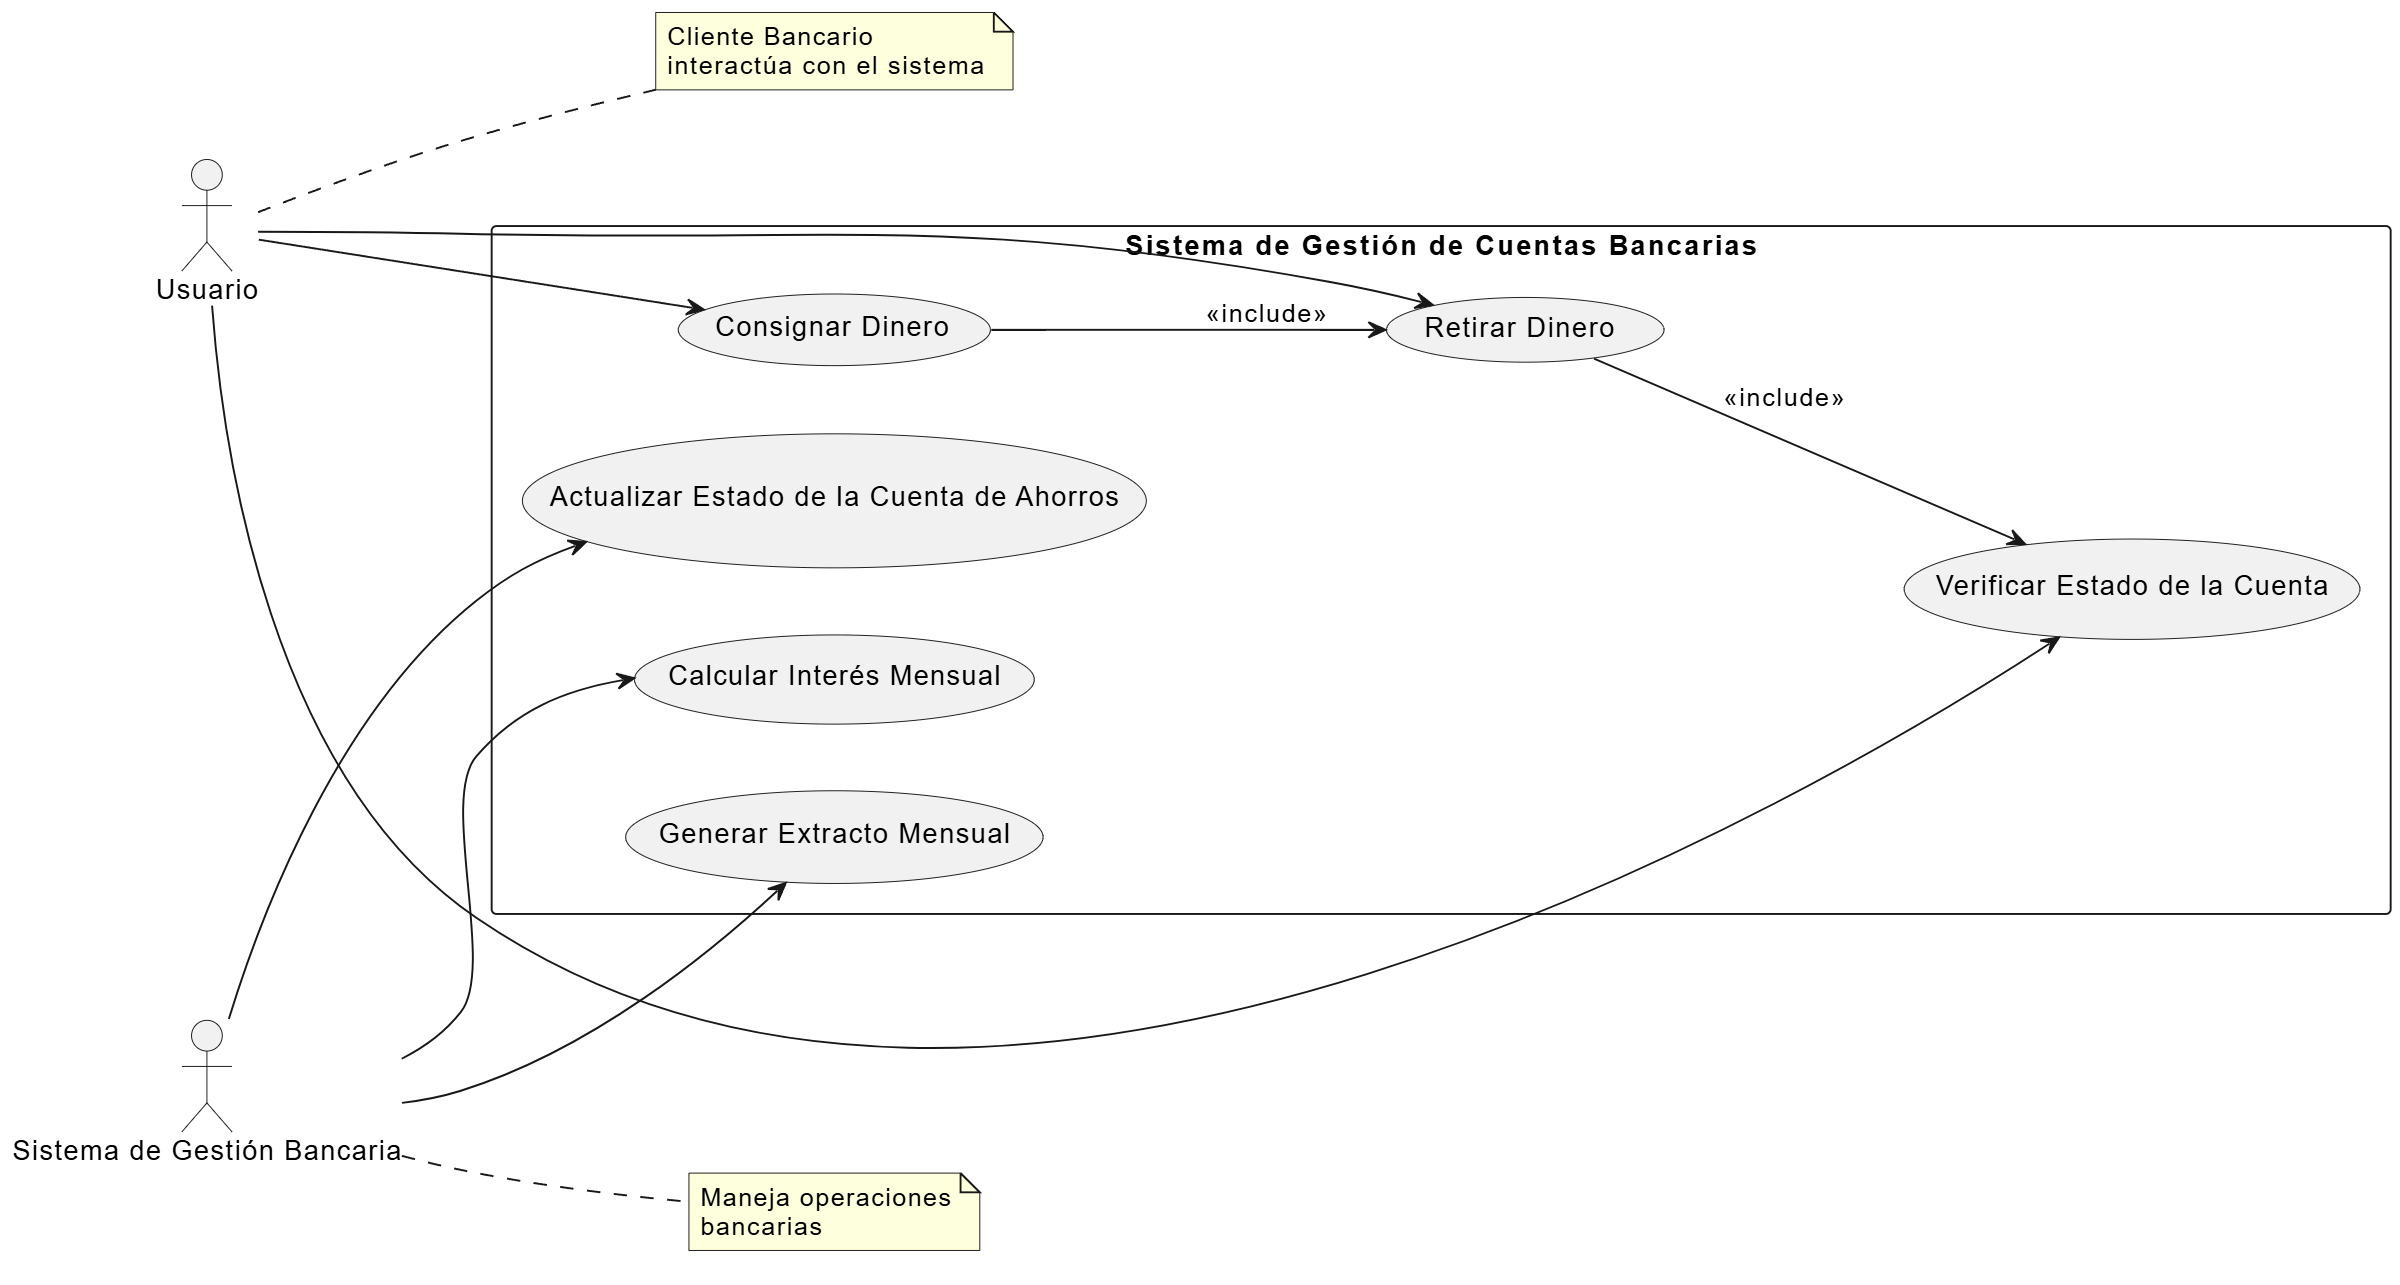

\# Ejercicio 4.2 Paquetes y métodos de acceso

In [ ]:
# Ejercicio 4.2 Paquetes y métodos de acceso
class Inmueble:
    def __init__(self, identificador: int, area: int, direccion: str):
        self._identificador = identificador
        self._area = area
        self._direccion = direccion

    def imprimir_informacion(self):
        print(f"ID: {self._identificador}, Área: {self._area} m², Dirección: {self._direccion}")


class InmuebleVivienda(Inmueble):
    def __init__(self, identificador: int, area: int, direccion: str, habitaciones: int, banos: int):
        super().__init__(identificador, area, direccion)
        self._habitaciones = habitaciones
        self._banos = banos

    def imprimir_informacion(self):
        super().imprimir_informacion()
        print(f"Habitaciones: {self._habitaciones}, Baños: {self._banos}")


class Casa(InmuebleVivienda):
    def __init__(self, identificador: int, area: int, direccion: str, habitaciones: int, banos: int, pisos: int):
        super().__init__(identificador, area, direccion, habitaciones, banos)
        self._pisos = pisos


class CasaRural(Casa):
    def __init__(self, identificador: int, area: int, direccion: str, habitaciones: int, banos: int, pisos: int, distancia: float, altitud: float):
        super().__init__(identificador, area, direccion, habitaciones, banos, pisos)
        self._distancia = distancia
        self._altitud = altitud

    def imprimir_informacion(self):
        super().imprimir_informacion()
        print(f"Distancia a cabecera municipal: {self._distancia} km, Altitud: {self._altitud} msnm")


class CasaUrbana(Casa):
    def __init__(self, identificador: int, area: int, direccion: str, habitaciones: int, banos: int, pisos: int, conjunto_cerrado: bool, administracion: float, areas_comunes: bool):
        super().__init__(identificador, area, direccion, habitaciones, banos, pisos)
        self._conjunto_cerrado = conjunto_cerrado
        self._administracion = administracion
        self._areas_comunes = areas_comunes

    def imprimir_informacion(self):
        super().imprimir_informacion()
        print(f"Conjunto cerrado: {self._conjunto_cerrado}, Administración: ${self._administracion:.2f}, Áreas comunes: {self._areas_comunes}")


class Apartamento(InmuebleVivienda):
    def __init__(self, identificador: int, area: int, direccion: str, habitaciones: int, banos: int, administracion: float):
        super().__init__(identificador, area, direccion, habitaciones, banos)
        self._administracion = administracion

    def imprimir_informacion(self):
        super().imprimir_informacion()
        print(f"Administración: ${self._administracion:.2f}")


class Apartaestudio(Apartamento):
    def __init__(self, identificador: int, area: int, direccion: str, administracion: float):
        super().__init__(identificador, area, direccion, 1, 1, administracion)

    def imprimir_informacion(self):
        super().imprimir_informacion()
        print("Tipo: Apartaestudio")


class Local(Inmueble):
    def __init__(self, identificador: int, area: int, direccion: str, localizacion: str):
        super().__init__(identificador, area, direccion)
        self._localizacion = localizacion

    def imprimir_informacion(self):
        super().imprimir_informacion()
        print(f"Localización: {self._localizacion}")


class LocalComercial(Local):
    def __init__(self, identificador: int, area: int, direccion: str, localizacion: str, centro_comercial: str):
        super().__init__(identificador, area, direccion, localizacion)
        self._centro_comercial = centro_comercial

    def imprimir_informacion(self):
        super().imprimir_informacion()
        print(f"Centro Comercial: {self._centro_comercial}")


class Oficina(Local):
    def __init__(self, identificador: int, area: int, direccion: str, localizacion: str, es_gubernamental: bool):
        super().__init__(identificador, area, direccion, localizacion)
        self._es_gubernamental = es_gubernamental

    def imprimir_informacion(self):
        super().imprimir_informacion()
        print(f"Es gubernamental: {self._es_gubernamental}")


if __name__ == "__main__":
    casa_rural = CasaRural(1, 120, "Finca Los Rosales", 3, 2, 2, 10.5, 2500)
    casa_rural.imprimir_informacion()

    print("\n")

    apartaestudio = Apartaestudio(2, 40, "Calle 45 #20-15", 150000)
    apartaestudio.imprimir_informacion()

    print("\n")

    oficina = Oficina(3, 80, "Avenida Caracas #30-50", "Interno", True)
    oficina.imprimir_informacion()


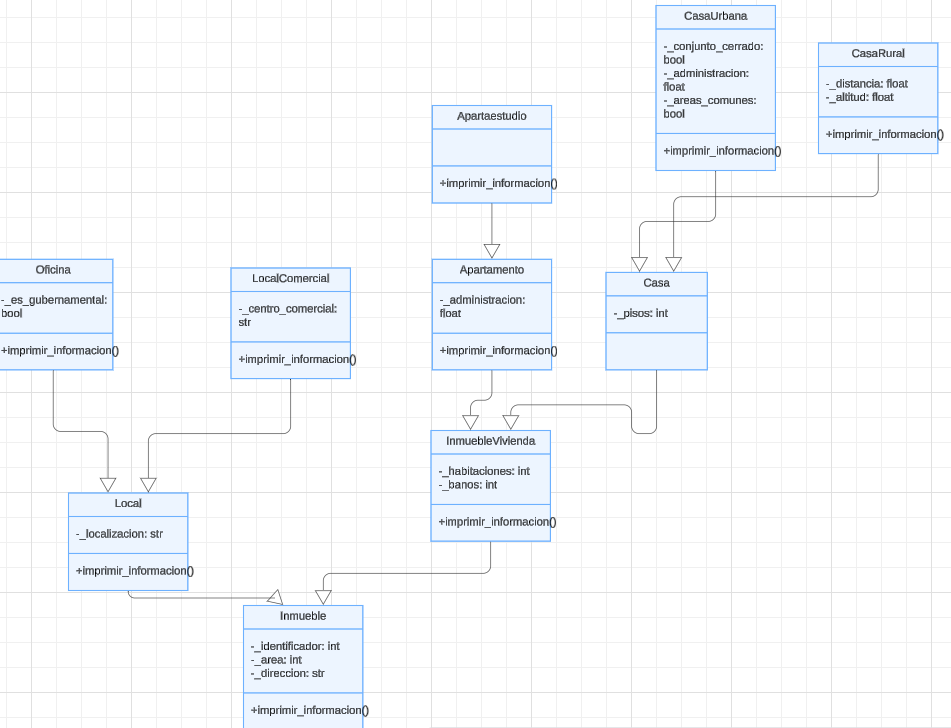

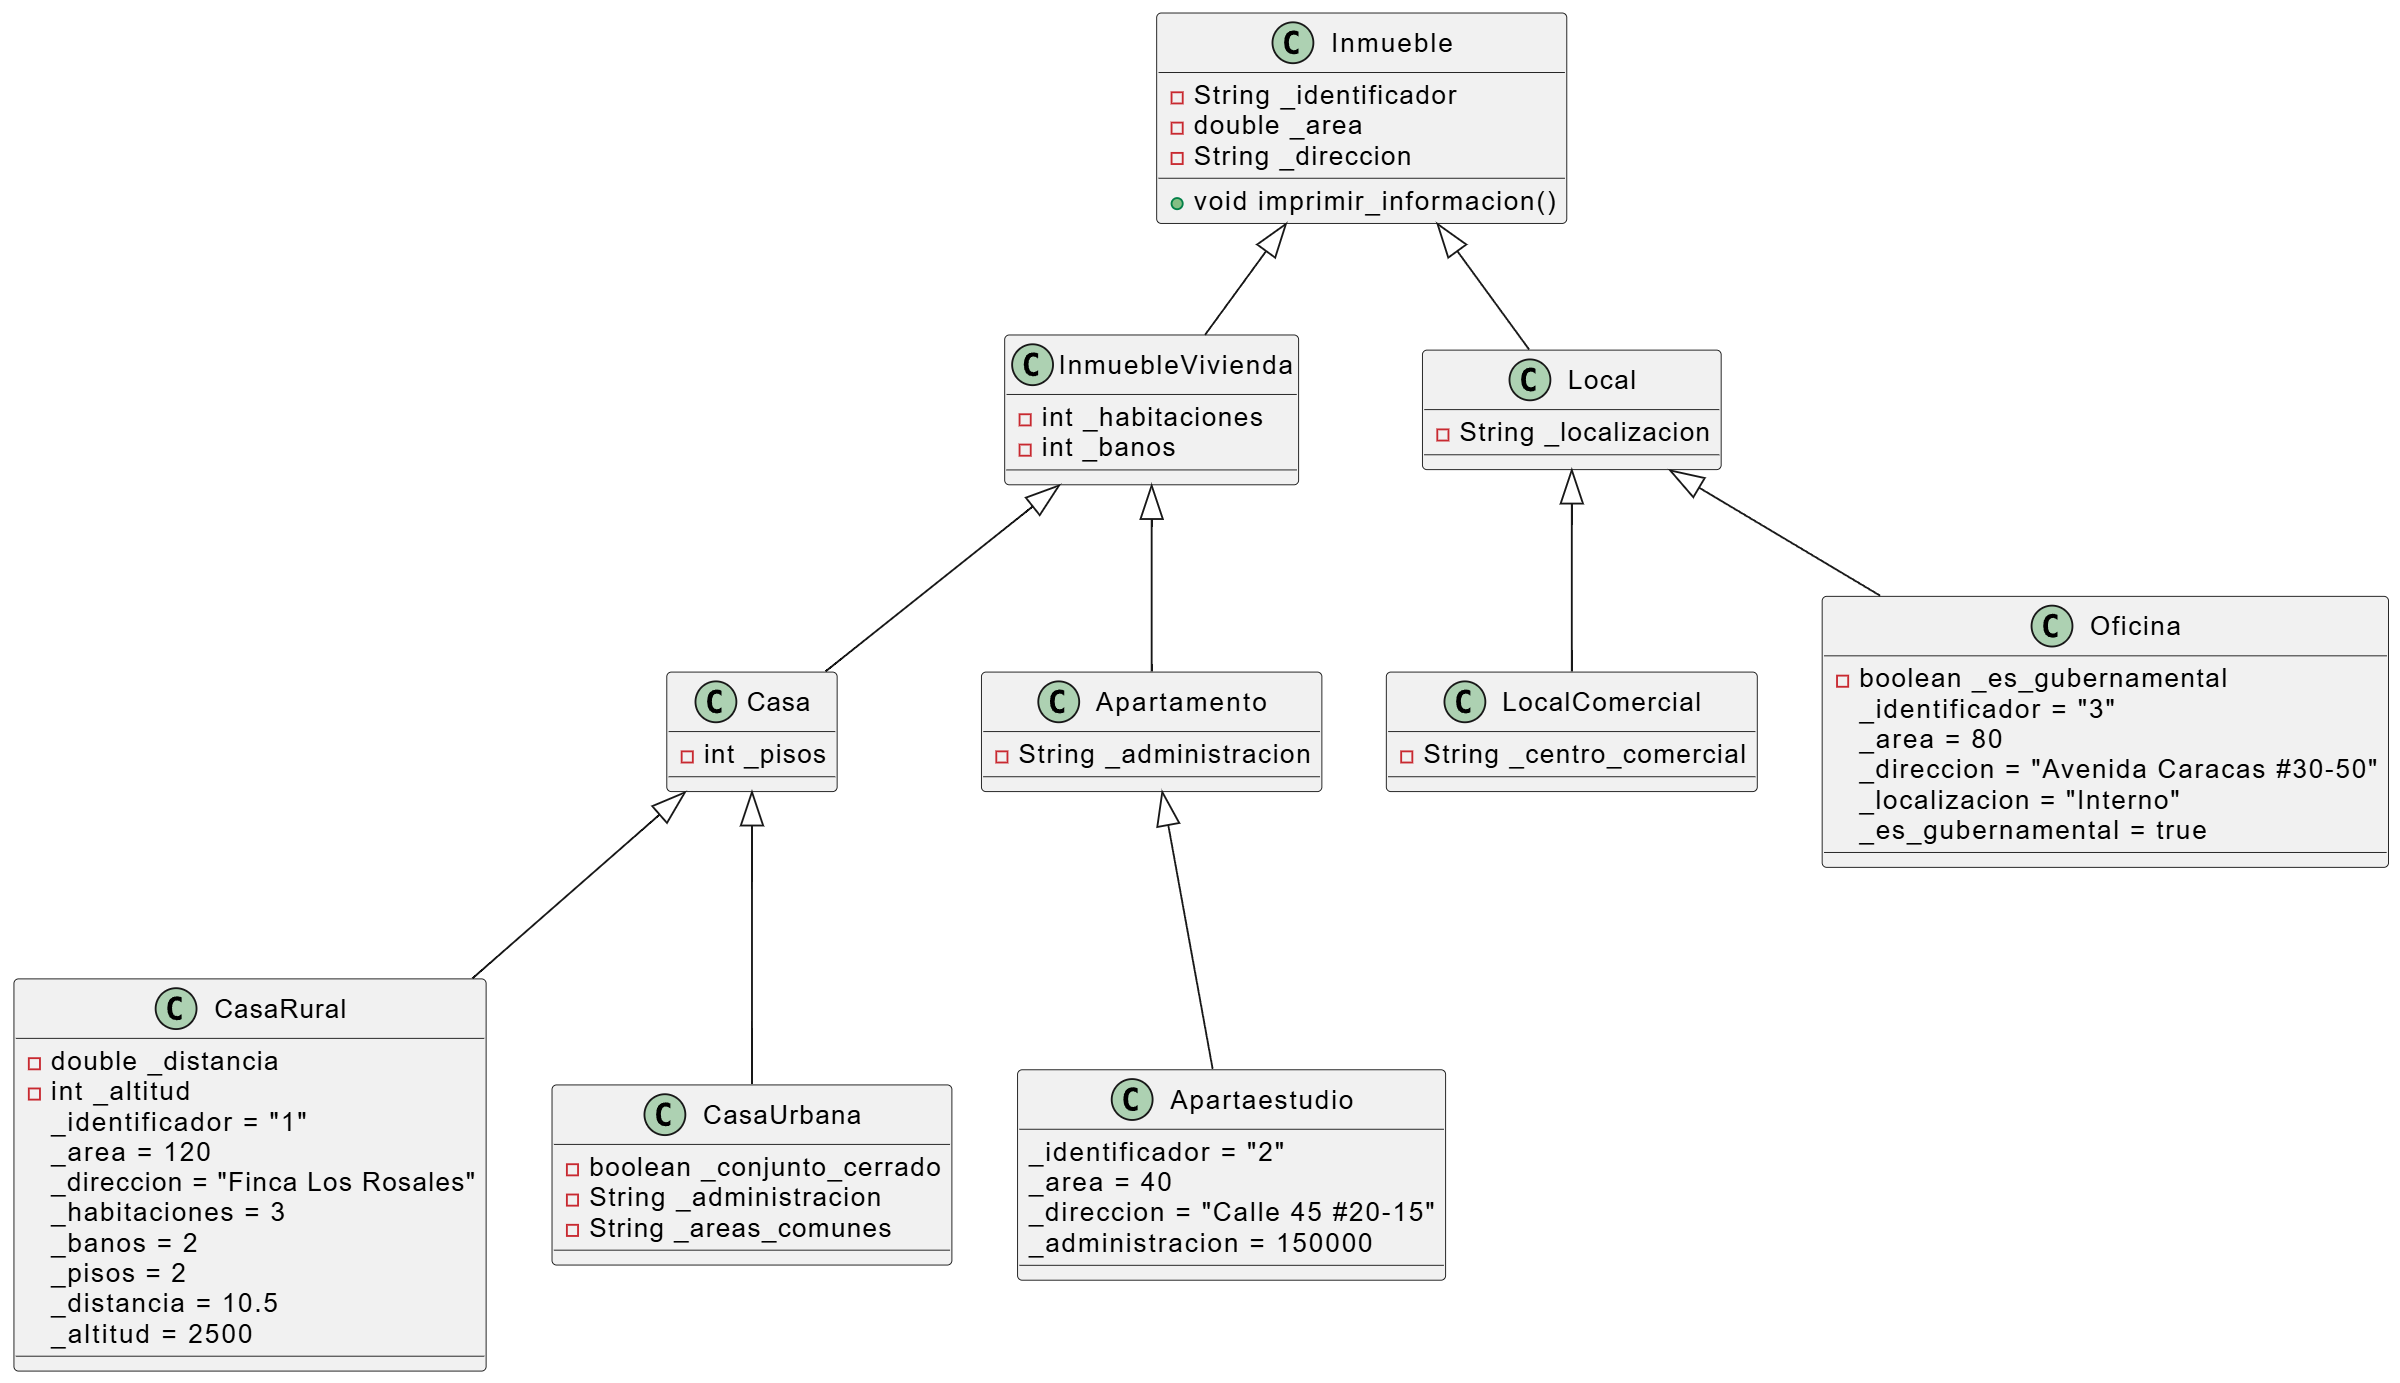

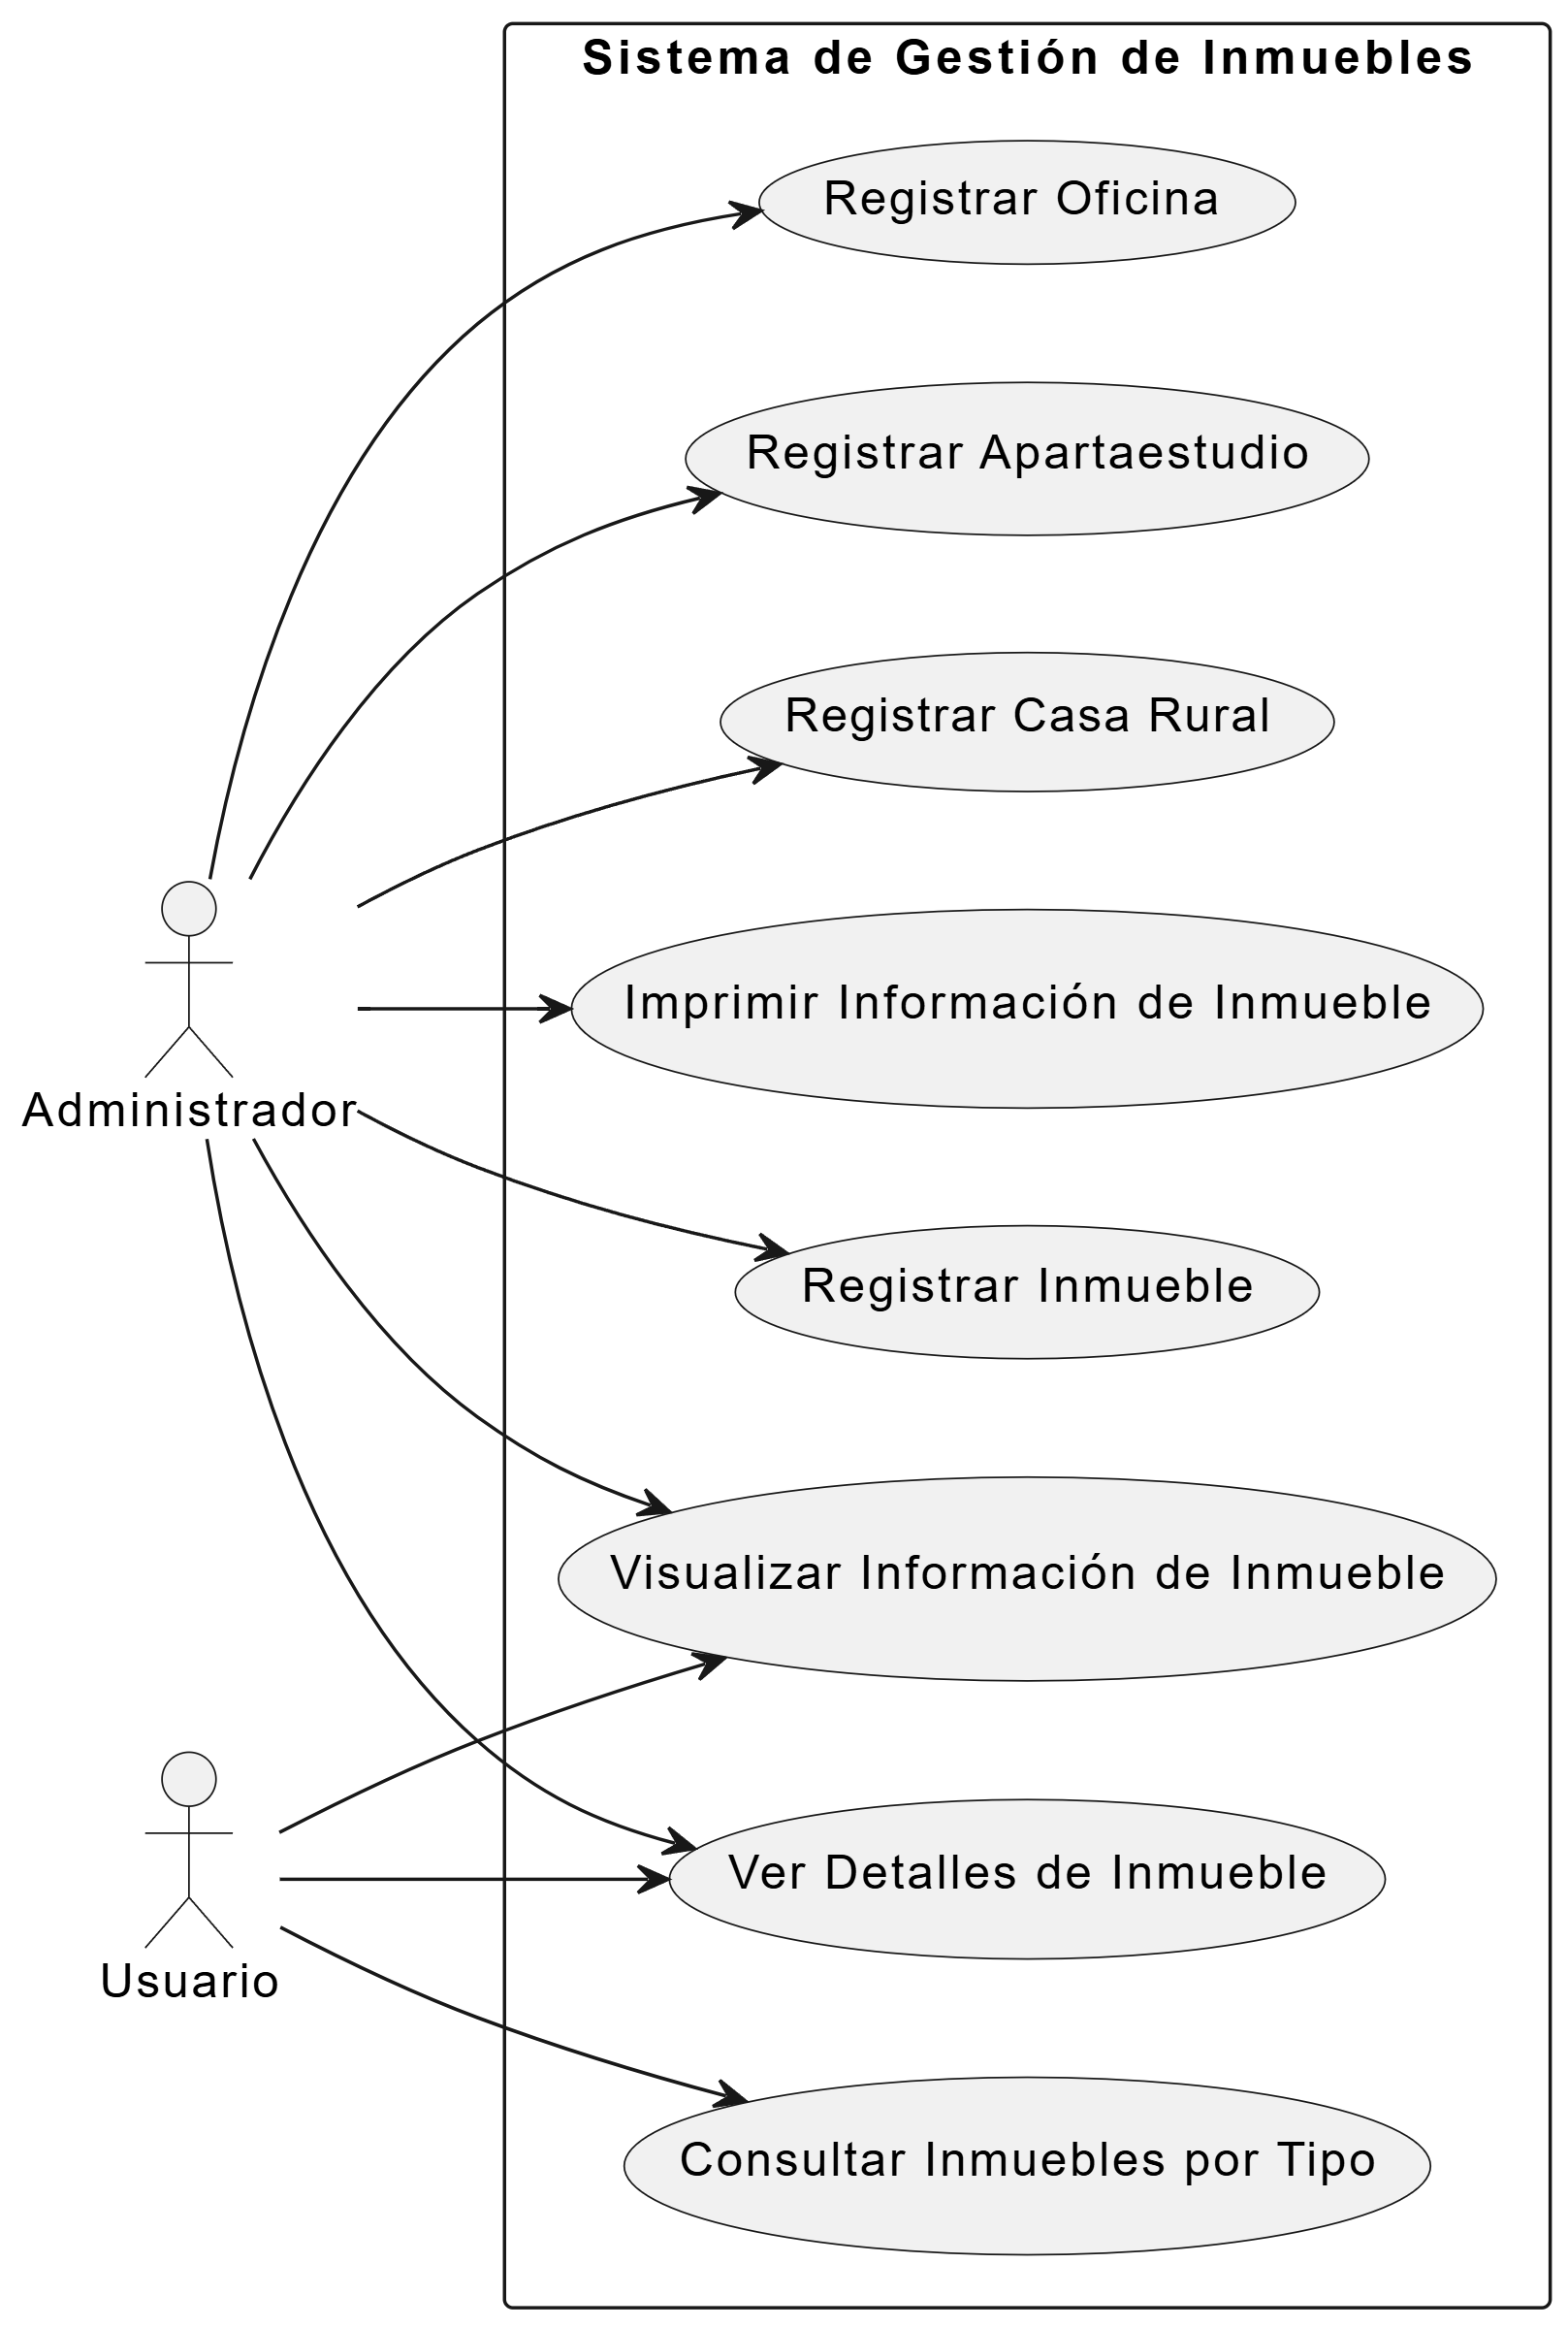

# Ejercicio 4.7 Clases Abstractas

In [ ]:
# Ejercicio 4.7 Clases Abstractas
from abc import ABC, abstractmethod

class Animal(ABC):
    def __init__(self, nombre_cientifico: str, sonido: str, alimentos: str, habitat: str):
        self._nombre_cientifico = nombre_cientifico
        self._sonido = sonido
        self._alimentos = alimentos
        self._habitat = habitat

    @abstractmethod
    def get_nombre_cientifico(self) -> str:
        pass

    @abstractmethod
    def get_sonido(self) -> str:
        pass

    @abstractmethod
    def get_alimentos(self) -> str:
        pass

    @abstractmethod
    def get_habitat(self) -> str:
        pass


class Canido(Animal):
    pass


class Felino(Animal):
    pass


class Perro(Canido):
    def __init__(self):
        super().__init__("Canis lupus familiaris", "Ladrido", "Carnívora", "Doméstico")

    def get_nombre_cientifico(self) -> str:
        return self._nombre_cientifico

    def get_sonido(self) -> str:
        return self._sonido

    def get_alimentos(self) -> str:
        return self._alimentos

    def get_habitat(self) -> str:
        return self._habitat


class Lobo(Canido):
    def __init__(self):
        super().__init__("Canis lupus", "Aullido", "Carnívora", "Bosque")

    def get_nombre_cientifico(self) -> str:
        return self._nombre_cientifico

    def get_sonido(self) -> str:
        return self._sonido

    def get_alimentos(self) -> str:
        return self._alimentos

    def get_habitat(self) -> str:
        return self._habitat


class Leon(Felino):
    def __init__(self):
        super().__init__("Panthera leo", "Rugido", "Carnívora", "Pradera")

    def get_nombre_cientifico(self) -> str:
        return self._nombre_cientifico

    def get_sonido(self) -> str:
        return self._sonido

    def get_alimentos(self) -> str:
        return self._alimentos

    def get_habitat(self) -> str:
        return self._habitat


class Gato(Felino):
    def __init__(self):
        super().__init__("Felis silvestris catus", "Maullido", "Ratones", "Doméstico")

    def get_nombre_cientifico(self) -> str:
        return self._nombre_cientifico

    def get_sonido(self) -> str:
        return self._sonido

    def get_alimentos(self) -> str:
        return self._alimentos

    def get_habitat(self) -> str:
        return self._habitat


if __name__ == "__main__":
    animales = [Perro(), Lobo(), Leon(), Gato()]

    for animal in animales:
        print("Nombre Científico:", animal.get_nombre_cientifico())
        print("Sonido:", animal.get_sonido())
        print("Alimentos:", animal.get_alimentos())
        print("Hábitat:", animal.get_habitat())
        print("-" * 40)

Nombre Científico: Canis lupus familiaris
Sonido: Ladrido
Alimentos: Carnívora
Hábitat: Doméstico
----------------------------------------
Nombre Científico: Canis lupus
Sonido: Aullido
Alimentos: Carnívora
Hábitat: Bosque
----------------------------------------
Nombre Científico: Panthera leo
Sonido: Rugido
Alimentos: Carnívora
Hábitat: Pradera
----------------------------------------
Nombre Científico: Felis silvestris catus
Sonido: Maullido
Alimentos: Ratones
Hábitat: Doméstico
----------------------------------------


Diagrama de clases

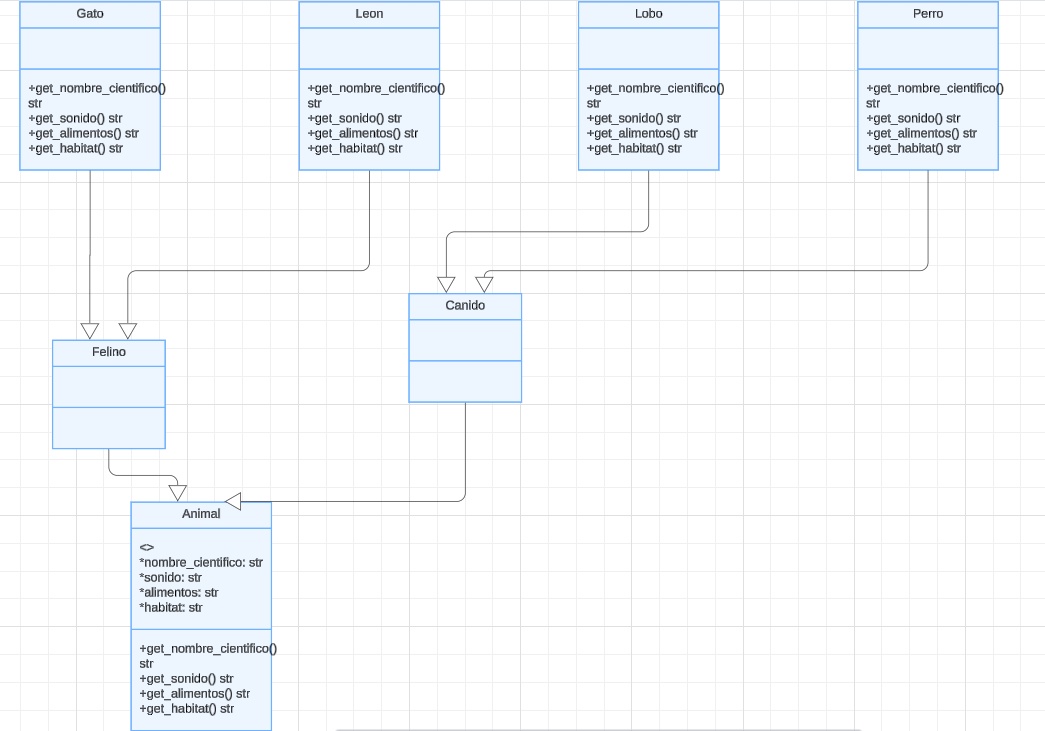

Diagrama de objetos

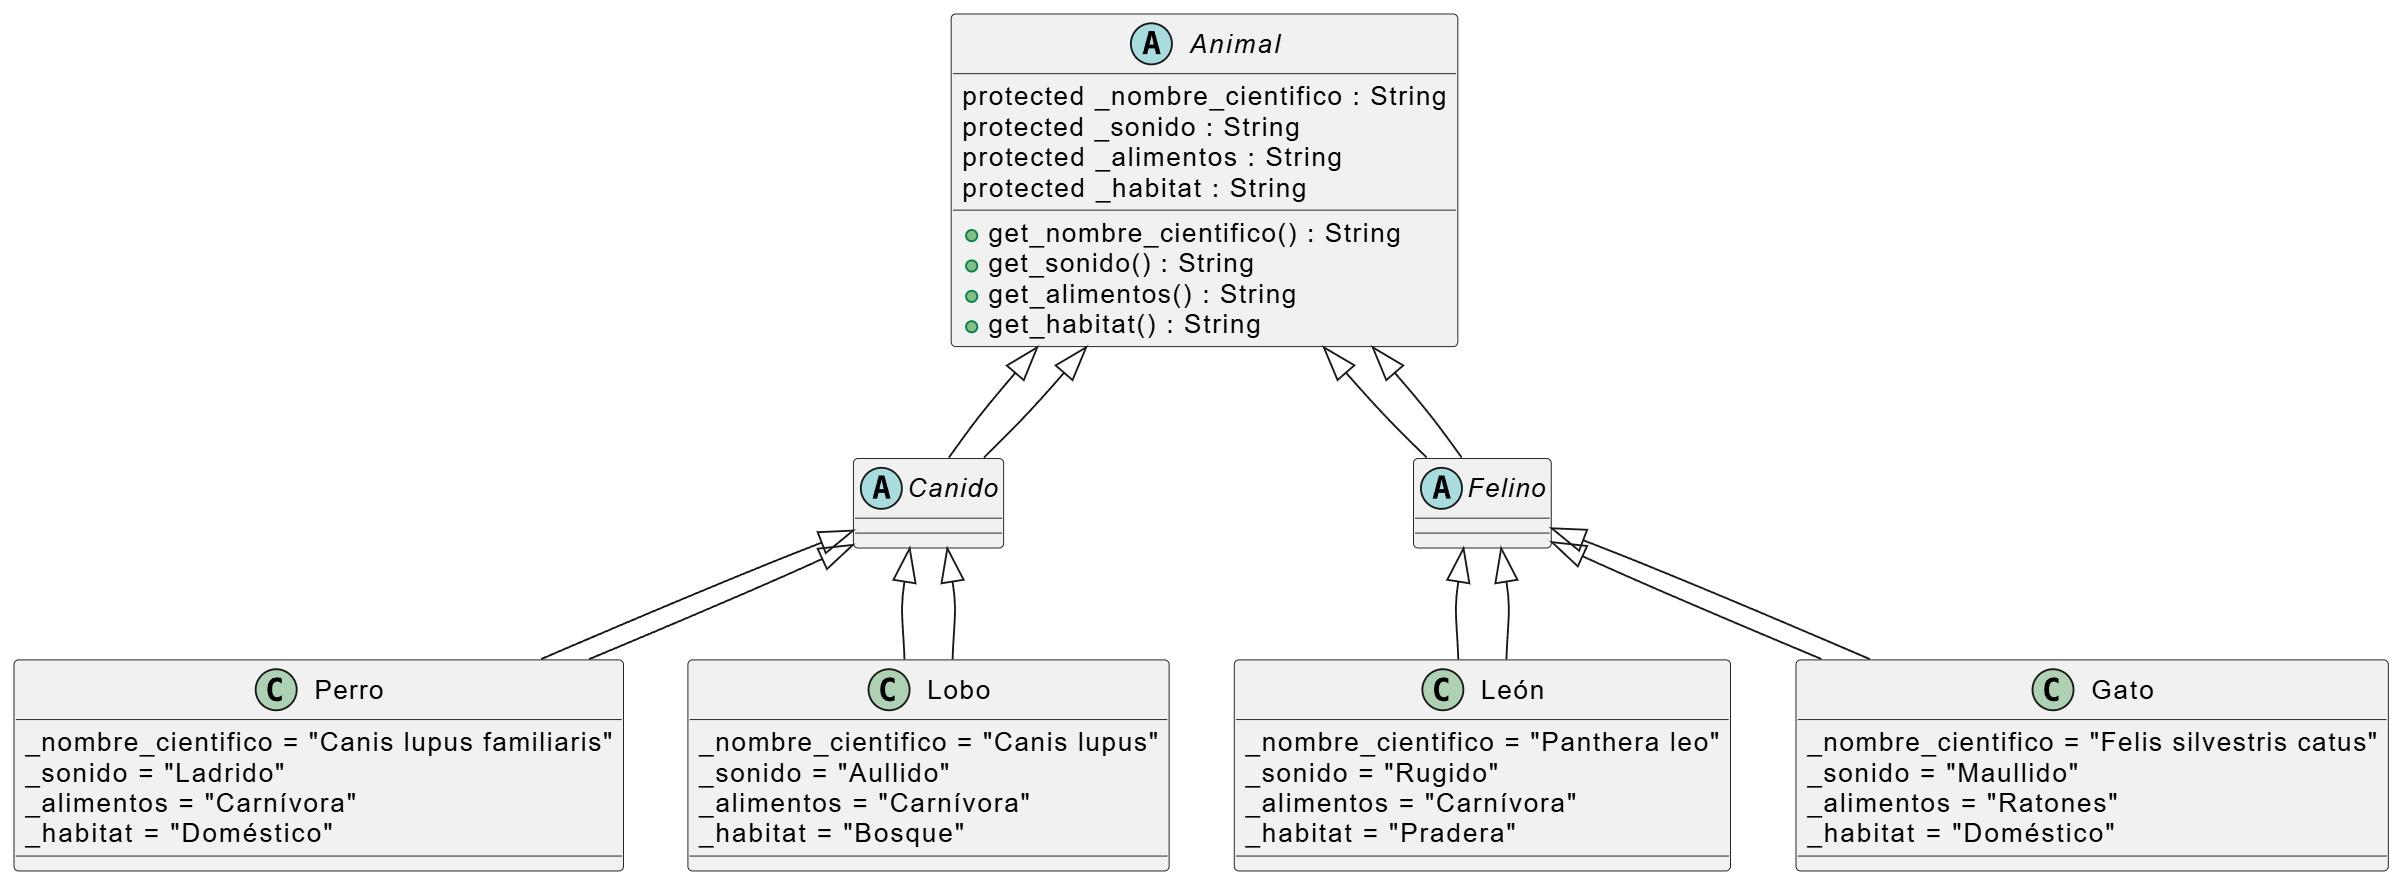

Diagrama de casos de uso

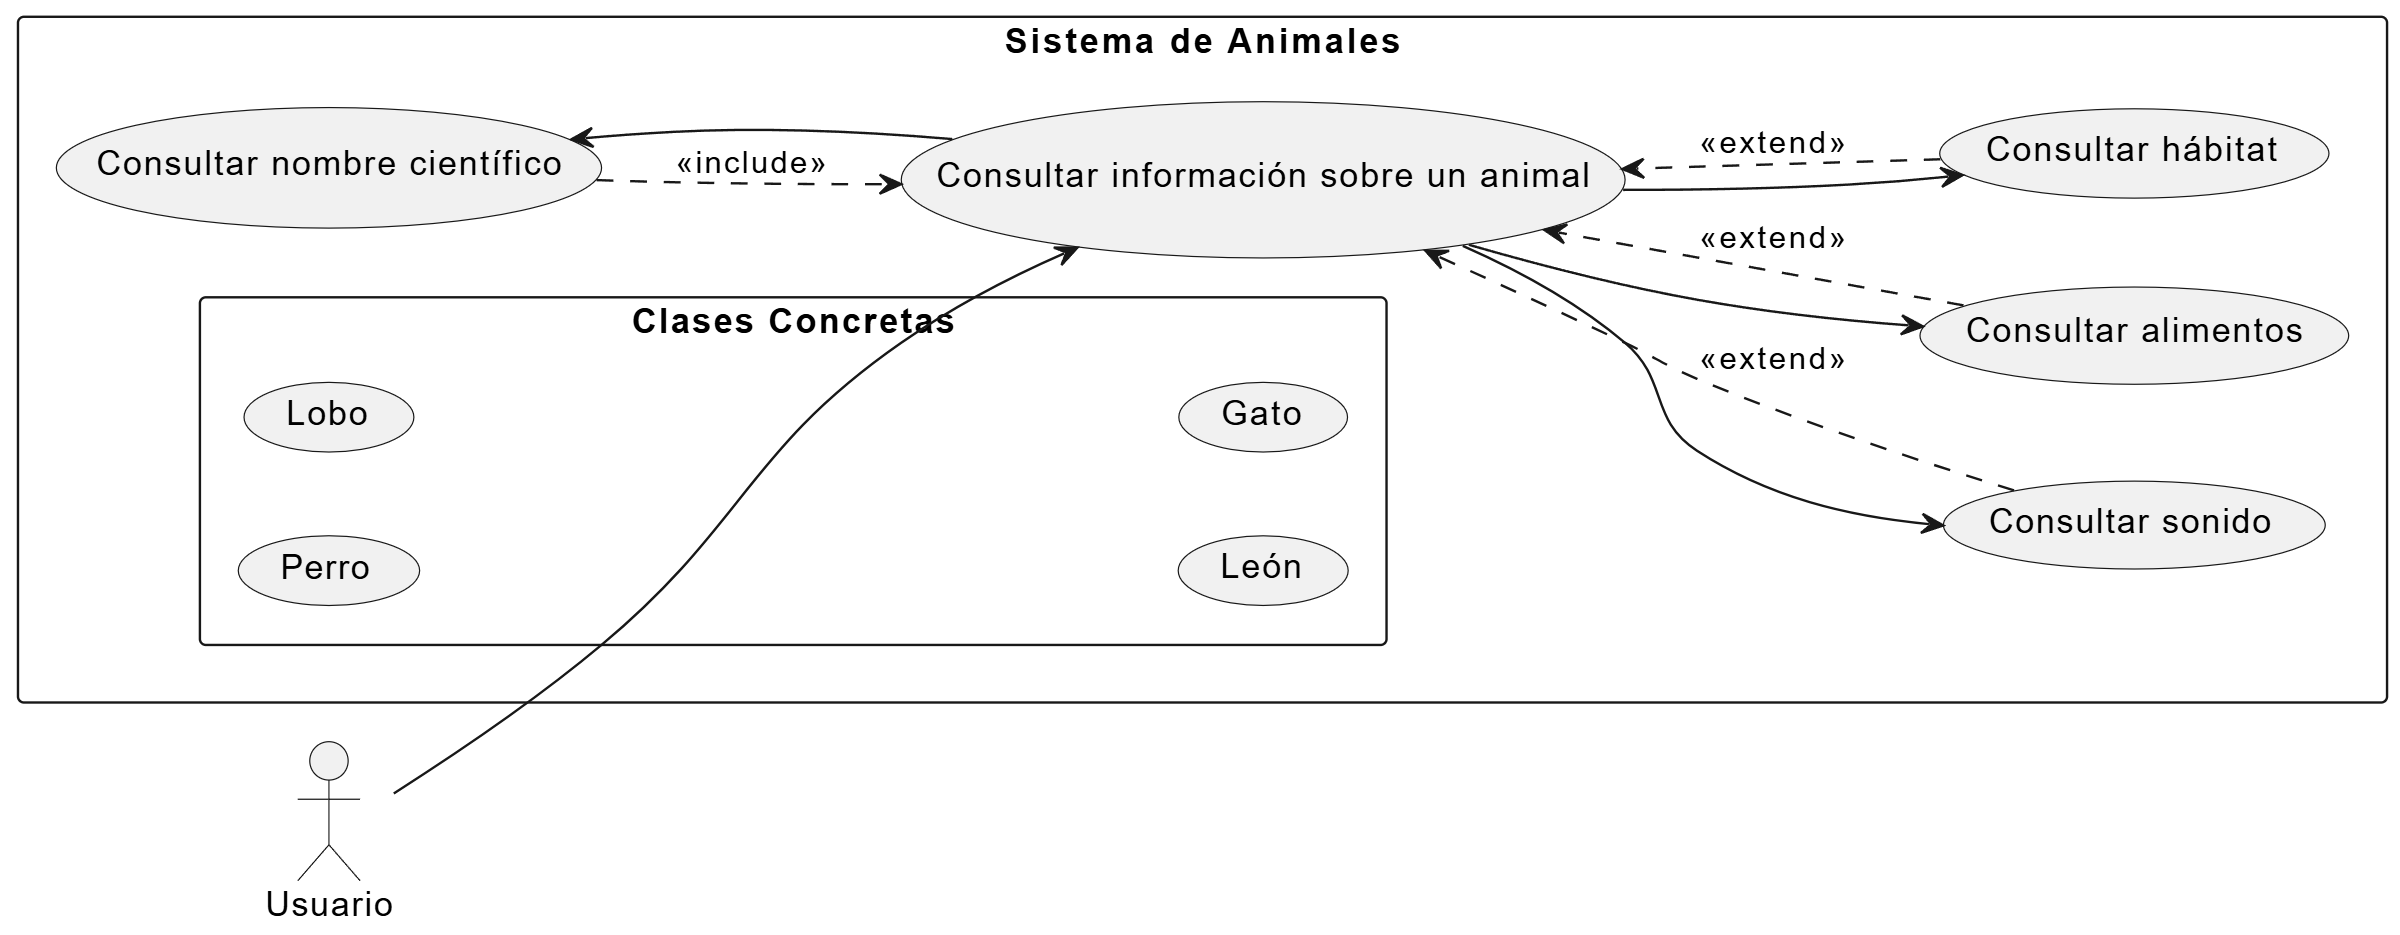

# Ejercicio 4.8 Métodos Abstractos


In [ ]:
# Ejercicio 4.8 Métodos Abstractos

from abc import ABC, abstractmethod
from typing import List

class Ciclista(ABC):
    def __init__(self, identificador: int, nombre: str):
        self.__identificador = identificador
        self.__nombre = nombre
        self.__tiempo_acumulado = 0

    # Getters y setters
    def get_identificador(self) -> int:
        return self.__identificador

    def get_nombre(self) -> str:
        return self.__nombre

    def get_tiempo_acumulado(self) -> int:
        return self.__tiempo_acumulado

    def set_tiempo_acumulado(self, tiempo: int):
        self.__tiempo_acumulado = tiempo

    @abstractmethod
    def imprimir_tipo(self) -> str:
        pass

    def imprimir(self) -> str:
        return f"Identificador: {self.__identificador}\nNombre: {self.__nombre}\nTiempo Acumulado: {self.__tiempo_acumulado}"

class Velocista(Ciclista):
    def __init__(self, identificador: int, nombre: str, potencia_promedio: float, velocidad_promedio: float):
        super().__init__(identificador, nombre)
        self.__potencia_promedio = potencia_promedio
        self.__velocidad_promedio = velocidad_promedio

    def get_potencia_promedio(self) -> float:
        return self.__potencia_promedio

    def get_velocidad_promedio(self) -> float:
        return self.__velocidad_promedio

    def set_potencia_promedio(self, potencia: float):
        self.__potencia_promedio = potencia

    def set_velocidad_promedio(self, velocidad: float):
        self.__velocidad_promedio = velocidad

    def imprimir_tipo(self) -> str:
        return "Es un Velocista"

    def imprimir(self) -> str:
        return f"{super().imprimir()}\nPotencia Promedio: {self.__potencia_promedio}\nVelocidad Promedio: {self.__velocidad_promedio}"

class Escalador(Ciclista):
    def __init__(self, identificador: int, nombre: str, aceleracion_promedio: float, grado_rampa: float):
        super().__init__(identificador, nombre)
        self.__aceleracion_promedio = aceleracion_promedio
        self.__grado_rampa = grado_rampa

    def get_aceleracion_promedio(self) -> float:
        return self.__aceleracion_promedio

    def get_grado_rampa(self) -> float:
        return self.__grado_rampa

    def set_aceleracion_promedio(self, aceleracion: float):
        self.__aceleracion_promedio = aceleracion

    def set_grado_rampa(self, grado: float):
        self.__grado_rampa = grado

    def imprimir_tipo(self) -> str:
        return "Es un Escalador"

    def imprimir(self) -> str:
        return f"{super().imprimir()}\nAceleración Promedio: {self.__aceleracion_promedio}\nGrado de Rampa: {self.__grado_rampa}"

class Contrarrelojista(Ciclista):
    def __init__(self, identificador: int, nombre: str, velocidad_maxima: float):
        super().__init__(identificador, nombre)
        self.__velocidad_maxima = velocidad_maxima

    def get_velocidad_maxima(self) -> float:
        return self.__velocidad_maxima

    def set_velocidad_maxima(self, velocidad: float):
        self.__velocidad_maxima = velocidad

    def imprimir_tipo(self) -> str:
        return "Es un Contrarrelojista"

    def imprimir(self) -> str:
        return f"{super().imprimir()}\nVelocidad Máxima: {self.__velocidad_maxima}"

class Equipo:
    tiempo_total = 0  # atributo estático

    def __init__(self, nombre: str, pais: str):
        self.__nombre = nombre
        self.__pais = pais
        self.__ciclistas: List[Ciclista] = []

    def get_nombre(self) -> str:
        return self.__nombre

    def get_pais(self) -> str:
        return self.__pais

    def set_nombre(self, nombre: str):
        self.__nombre = nombre

    def set_pais(self, pais: str):
        self.__pais = pais

    def agregar_ciclista(self, ciclista: Ciclista):
        self.__ciclistas.append(ciclista)
        self.calcular_total_tiempos()

    def calcular_total_tiempos(self):
        Equipo.tiempo_total = sum(ciclista.get_tiempo_acumulado() for ciclista in self.__ciclistas)

    def listar_ciclistas(self):
        return [ciclista.get_nombre() for ciclista in self.__ciclistas]

    def buscar_ciclista(self, identificador: int) -> Ciclista:
        for ciclista in self.__ciclistas:
            if ciclista.get_identificador() == identificador:
                return ciclista
        return None

    def imprimir(self) -> str:
        return f"Equipo: {self.__nombre}\nPaís: {self.__pais}\nTiempo Total: {Equipo.tiempo_total}"

# Clase de prueba
def main():
    # Crear un equipo
    equipo = Equipo("Sky", "Reino Unido")

    # Crear ciclistas
    velocista = Velocista(1, "Peter Sagan", 350.5, 65.7)
    velocista.set_tiempo_acumulado(120)

    escalador = Escalador(2, "Nairo Quintana", 7.7, 15.5)
    escalador.set_tiempo_acumulado(125)

    contrarrelojista = Contrarrelojista(3, "Tony Martin", 55.5)
    contrarrelojista.set_tiempo_acumulado(118)

    # Agregar ciclistas al equipo
    equipo.agregar_ciclista(velocista)
    equipo.agregar_ciclista(escalador)
    equipo.agregar_ciclista(contrarrelojista)

    # Imprimir información del equipo
    print(equipo.imprimir())
    print("\nLista de ciclistas:")
    for nombre in equipo.listar_ciclistas():
        print(nombre)

    # Buscar un ciclista por ID
    id_buscar = 2
    ciclista = equipo.buscar_ciclista(id_buscar)
    if ciclista:
        print(f"\nCiclista encontrado:\n{ciclista.imprimir()}")
        print(ciclista.imprimir_tipo())
    else:
        print(f"\nNo se encontró un ciclista con ID {id_buscar}")

if __name__ == "__main__":
    main()

Equipo: Sky
País: Reino Unido
Tiempo Total: 363

Lista de ciclistas:
Peter Sagan
Nairo Quintana
Tony Martin

Ciclista encontrado:
Identificador: 2
Nombre: Nairo Quintana
Tiempo Acumulado: 125
Aceleración Promedio: 7.7
Grado de Rampa: 15.5
Es un Escalador


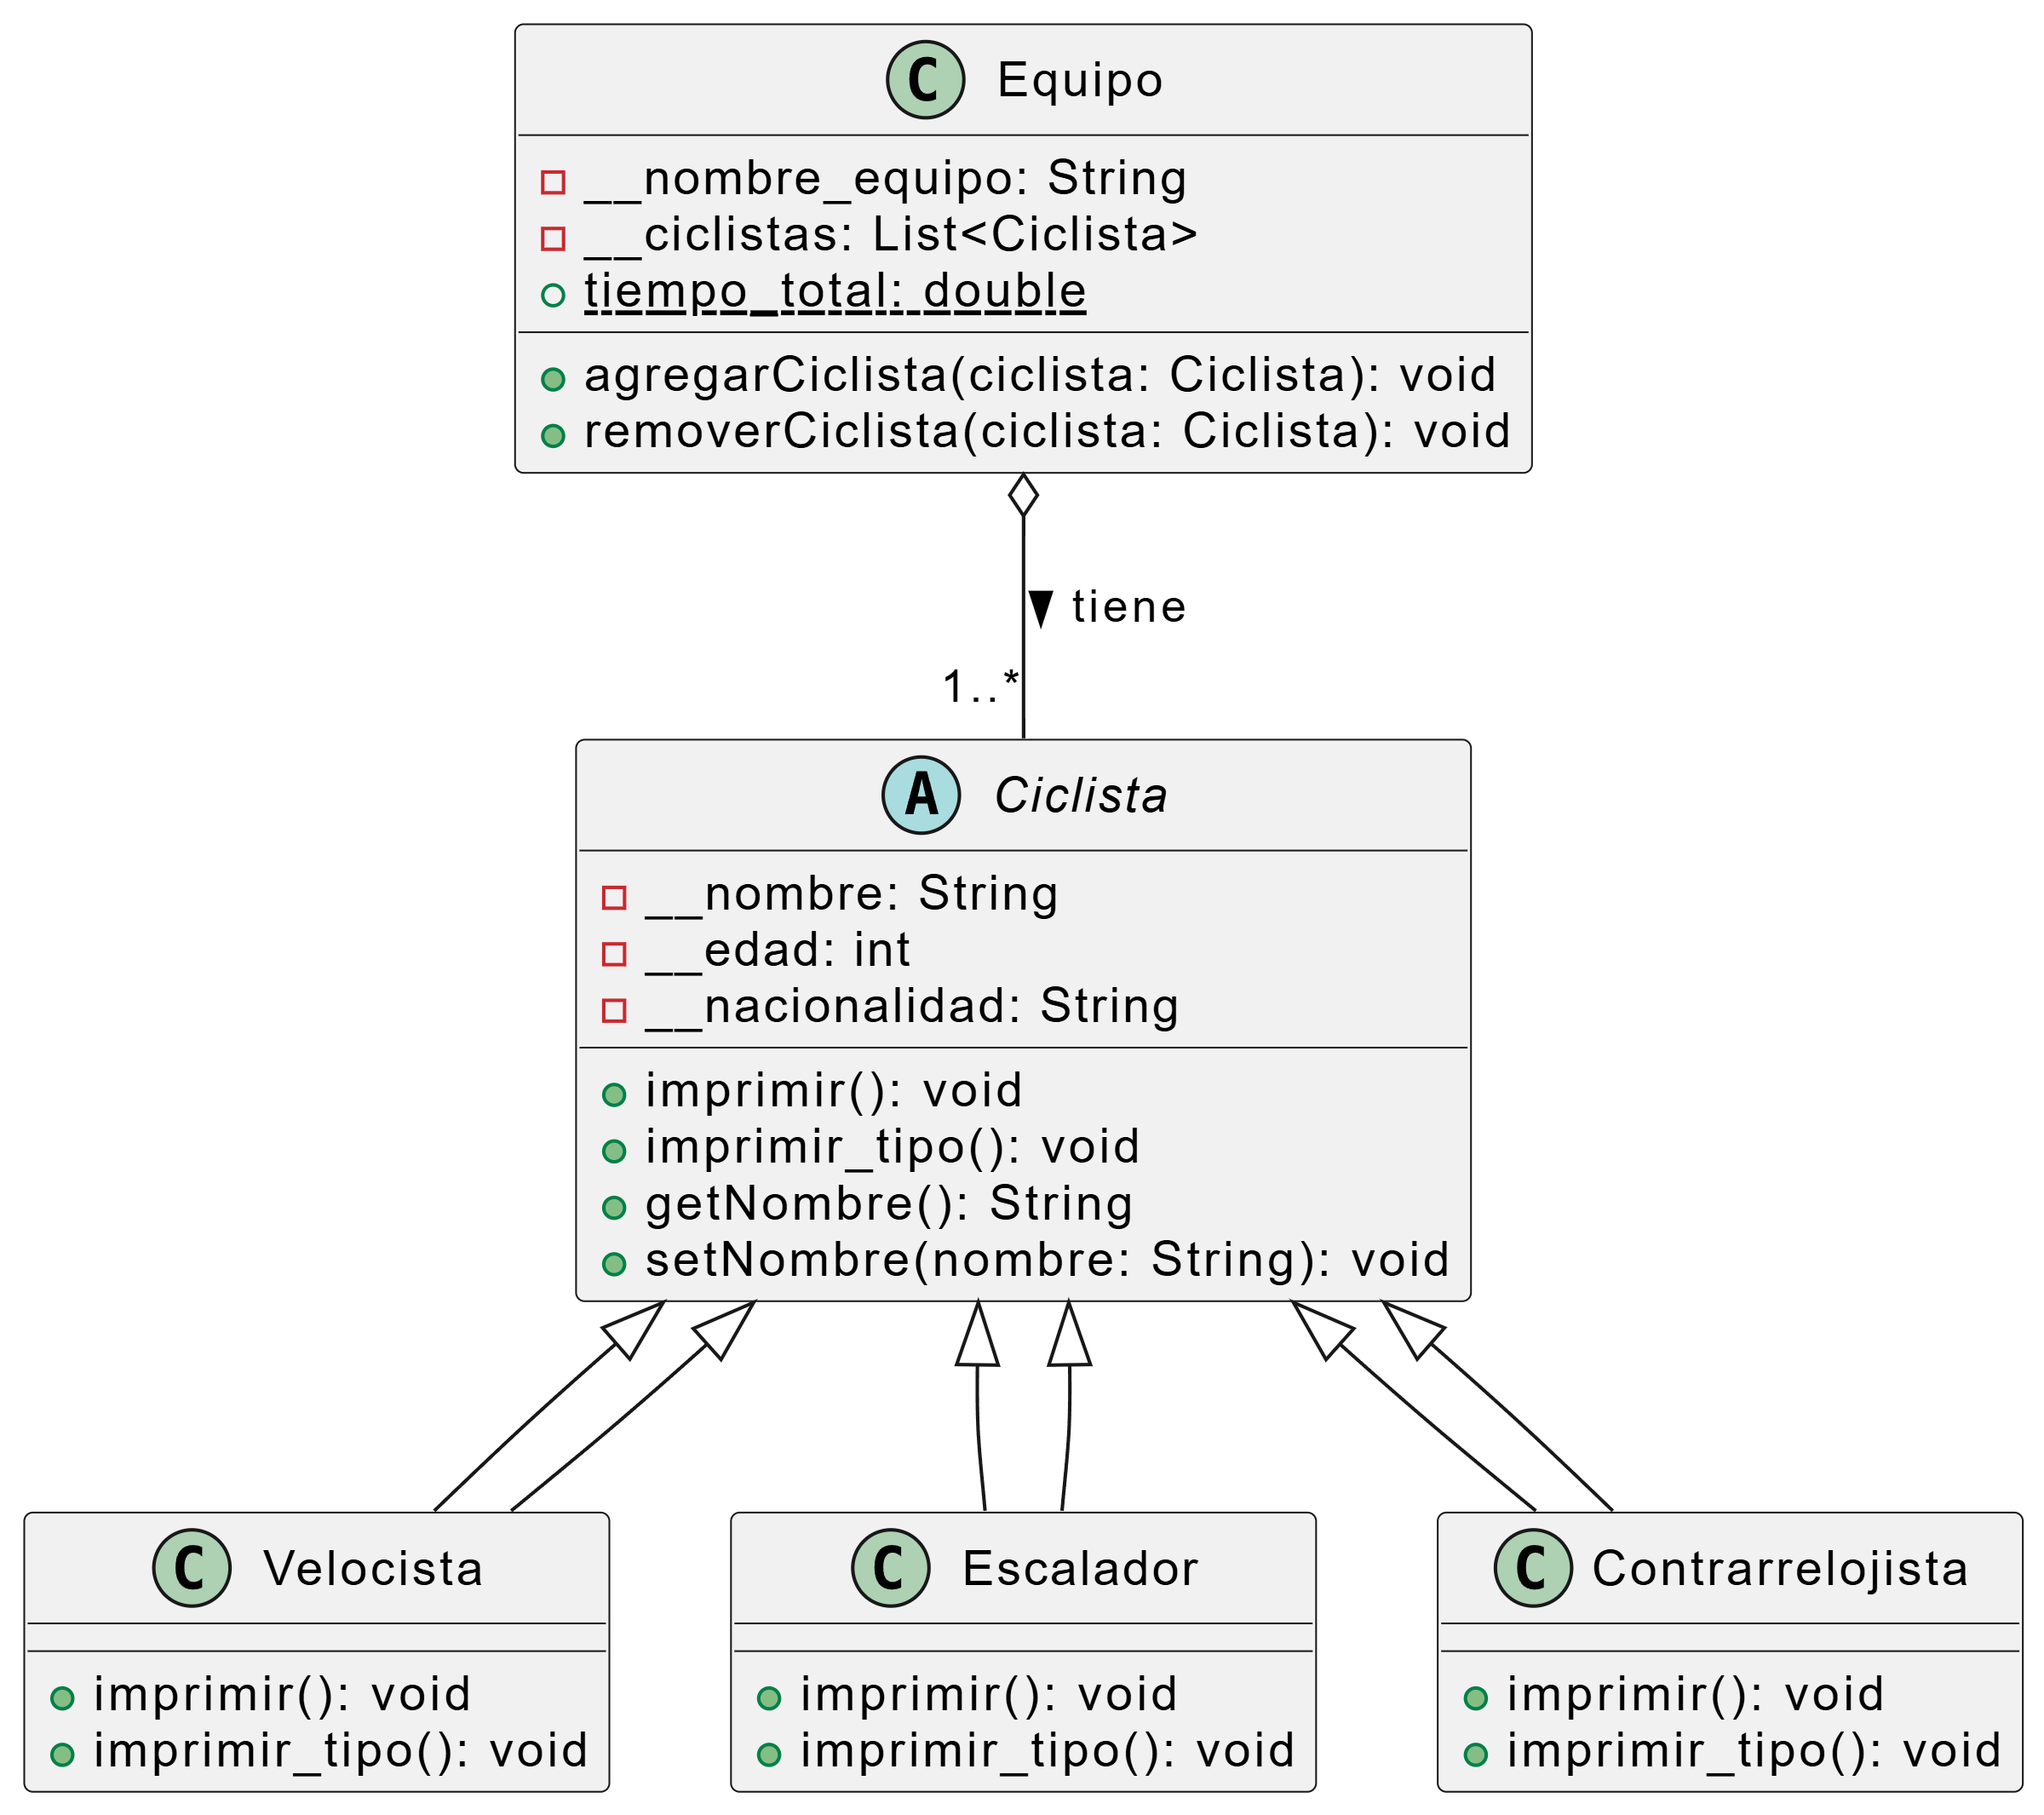

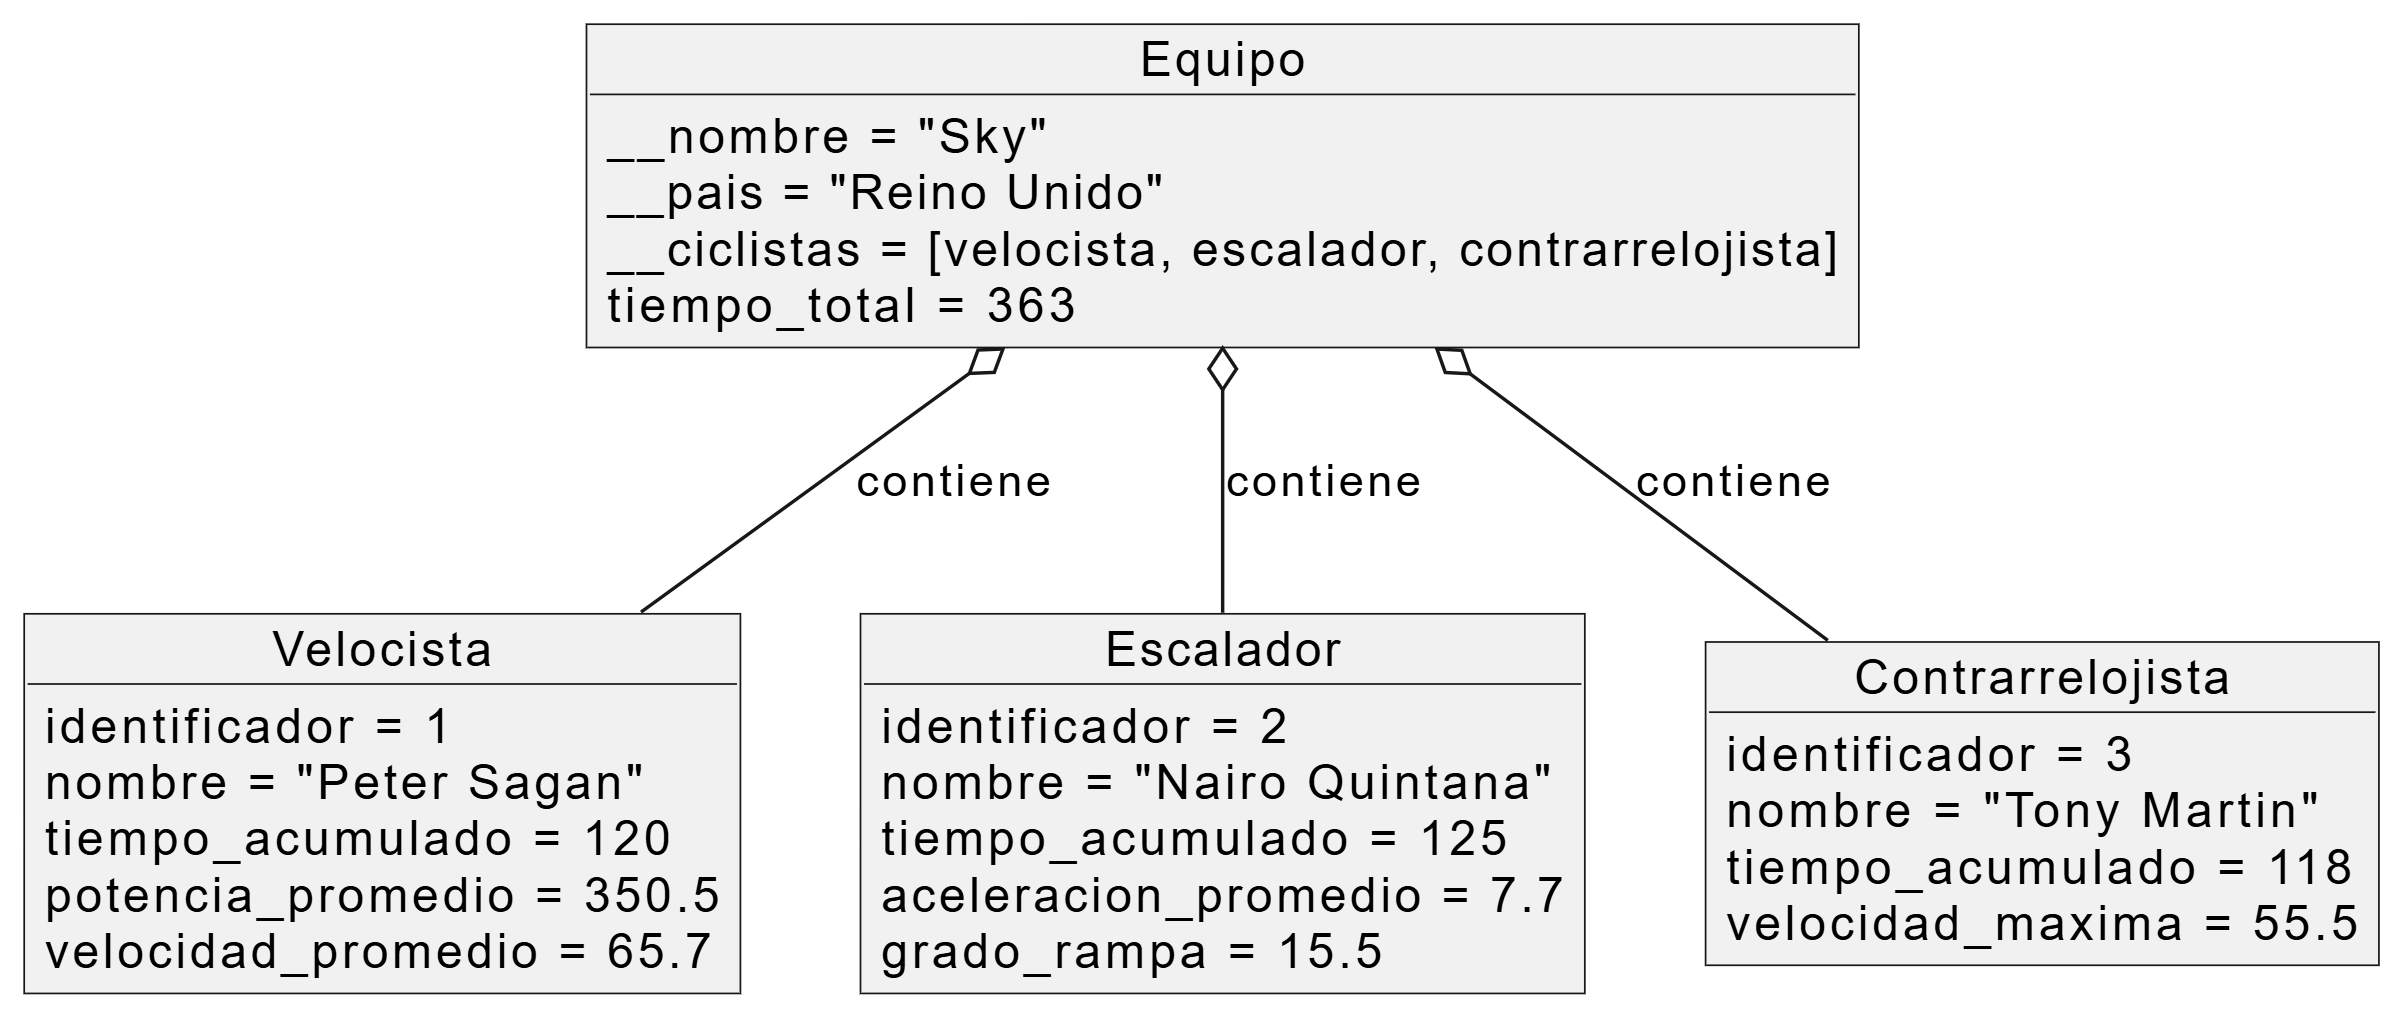

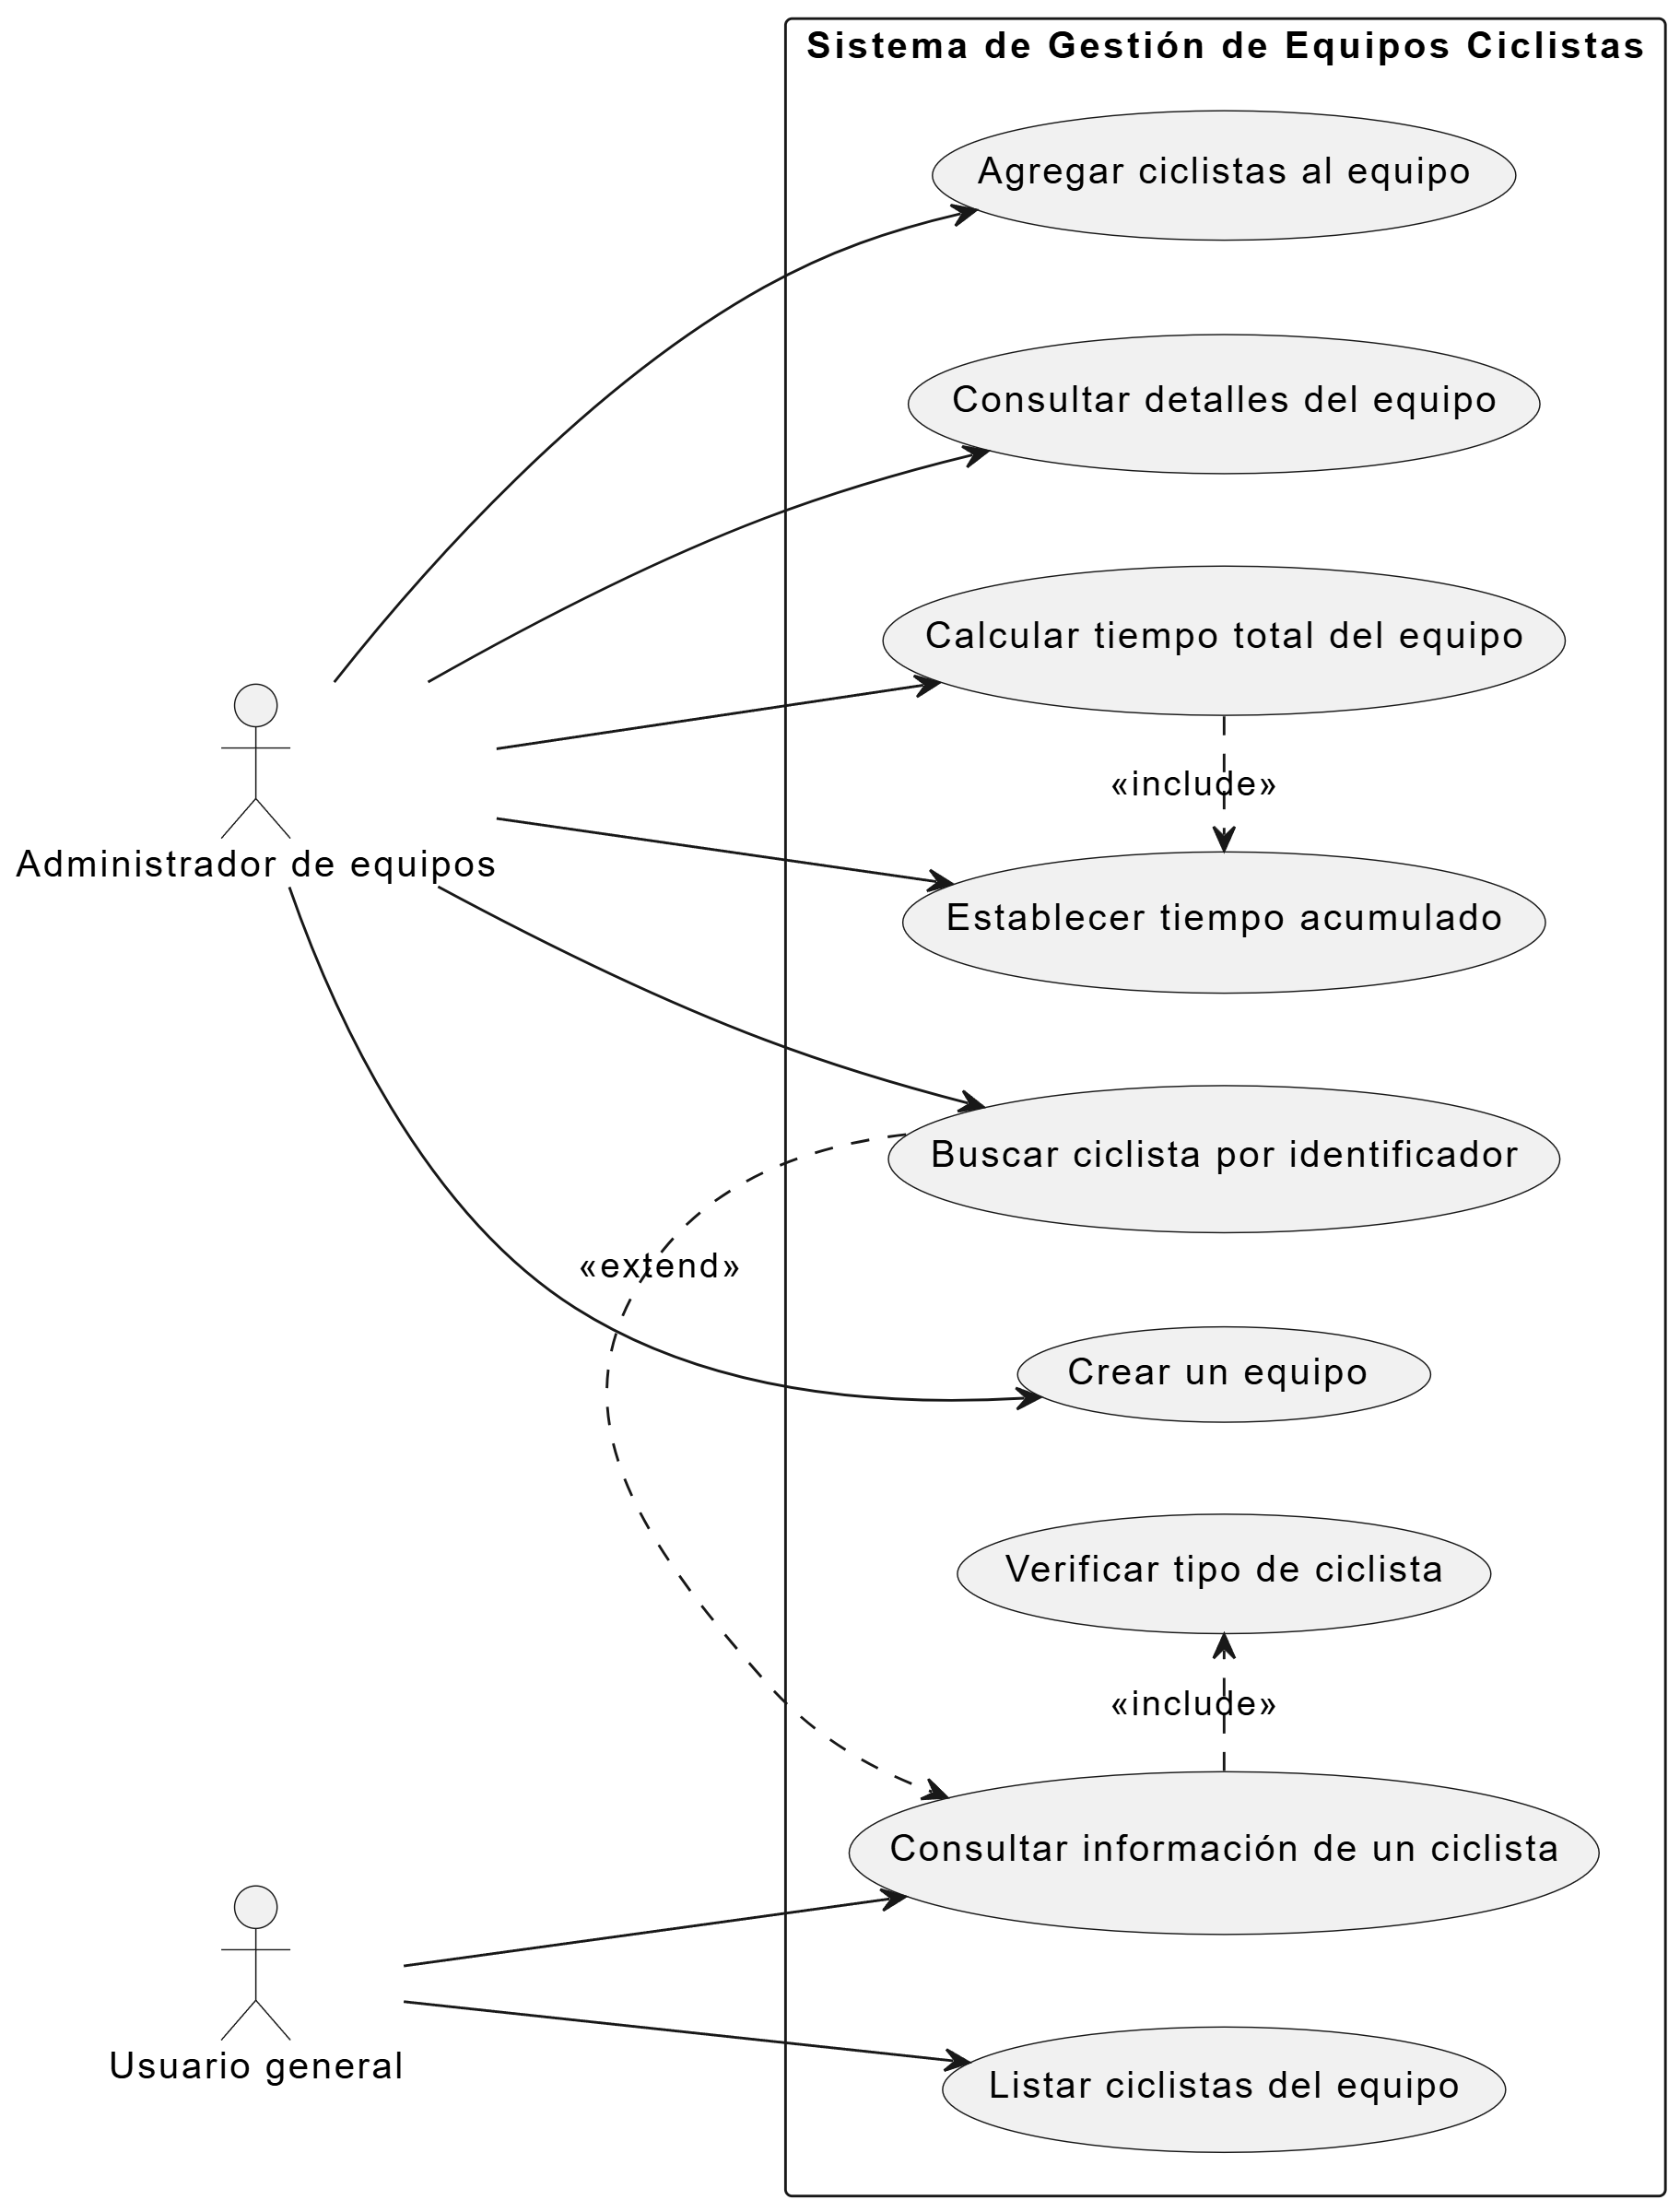

# Ejercicio *8.1*

In [ ]:
#  Ejercicio 8.1
!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

class PersonManagerColab:
    def __init__(self):
        self.people = []

        # Campos de entrada
        self.nombre_input = widgets.Text(description='Nombre:', placeholder='Ingrese nombre')
        self.apellidos_input = widgets.Text(description='Apellidos:', placeholder='Ingrese apellidos')
        self.direccion_input = widgets.Text(description='Dirección:', placeholder='Ingrese dirección')
        self.telefono_input = widgets.Text(description='Teléfono:', placeholder='Ingrese teléfono')

        # Botones
        self.add_button = widgets.Button(description='Agregar Persona')
        self.delete_button = widgets.Button(description='Eliminar Seleccionado')
        self.clear_button = widgets.Button(description='Eliminar Todo')

        # Output para mensajes
        self.output = widgets.Output()

        # Tabla de personas
        self.table = widgets.HTML(value='<h3>Lista de Personas</h3>')

        # Configurar eventos de botones
        self.add_button.on_click(self.add_person)
        self.delete_button.on_click(self.delete_selected)
        self.clear_button.on_click(self.delete_all)

        # Layout
        self.create_layout()

    def create_layout(self):
        # Crear layout con los widgets
        input_box = widgets.VBox([
            self.nombre_input,
            self.apellidos_input,
            self.direccion_input,
            self.telefono_input
        ])

        button_box = widgets.HBox([
            self.add_button,
            self.delete_button,
            self.clear_button
        ])

        # Mostrar todos los elementos
        display(input_box)
        display(button_box)
        display(self.output)
        display(self.table)

    def update_table(self):
        if not self.people:
            self.table.value = '<h3>Lista de Personas</h3><p>No hay personas registradas</p>'
            return

        # Crear DataFrame para mejor visualización
        df = pd.DataFrame(self.people, columns=['Nombre', 'Apellidos', 'Dirección', 'Teléfono'])

        # Convertir DataFrame a HTML con estilos
        table_html = '''
        <h3>Lista de Personas</h3>
        <style>
            table {border-collapse: collapse; width: 100%;}
            th, td {padding: 8px; text-align: left; border: 1px solid #ddd;}
            th {background-color: #f2f2f2;}
            tr:nth-child(even) {background-color: #f9f9f9;}
        </style>
        '''
        table_html += df.to_html(index=False)
        self.table.value = table_html

    def add_person(self, b):
        with self.output:
            clear_output()

            # Obtener valores
            nombre = self.nombre_input.value.strip()
            apellidos = self.apellidos_input.value.strip()
            direccion = self.direccion_input.value.strip()
            telefono = self.telefono_input.value.strip()

            # Validar campos
            if not all([nombre, apellidos, direccion, telefono]):
                print("Error: Por favor, complete todos los campos")
                return

            # Agregar persona
            person = (nombre, apellidos, direccion, telefono)
            self.people.append(person)

            # Limpiar campos
            self.nombre_input.value = ''
            self.apellidos_input.value = ''
            self.direccion_input.value = ''
            self.telefono_input.value = ''

            print("Persona agregada exitosamente")
            self.update_table()

    def delete_selected(self, b):
        with self.output:
            clear_output()
            if not self.people:
                print("No hay personas para eliminar")
                return

            # En esta versión simplificada, eliminamos la última persona agregada
            self.people.pop()
            print("Última persona eliminada")
            self.update_table()

    def delete_all(self, b):
        with self.output:
            clear_output()
            if not self.people:
                print("La lista ya está vacía")
                return

            self.people.clear()
            print("Todas las personas han sido eliminadas")
            self.update_table()

# Crear y mostrar la aplicación
app = PersonManagerColab()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.3 MB/s eta 0:00:00


Output()

HTML(value='<h3>Lista de Personas</h3>')

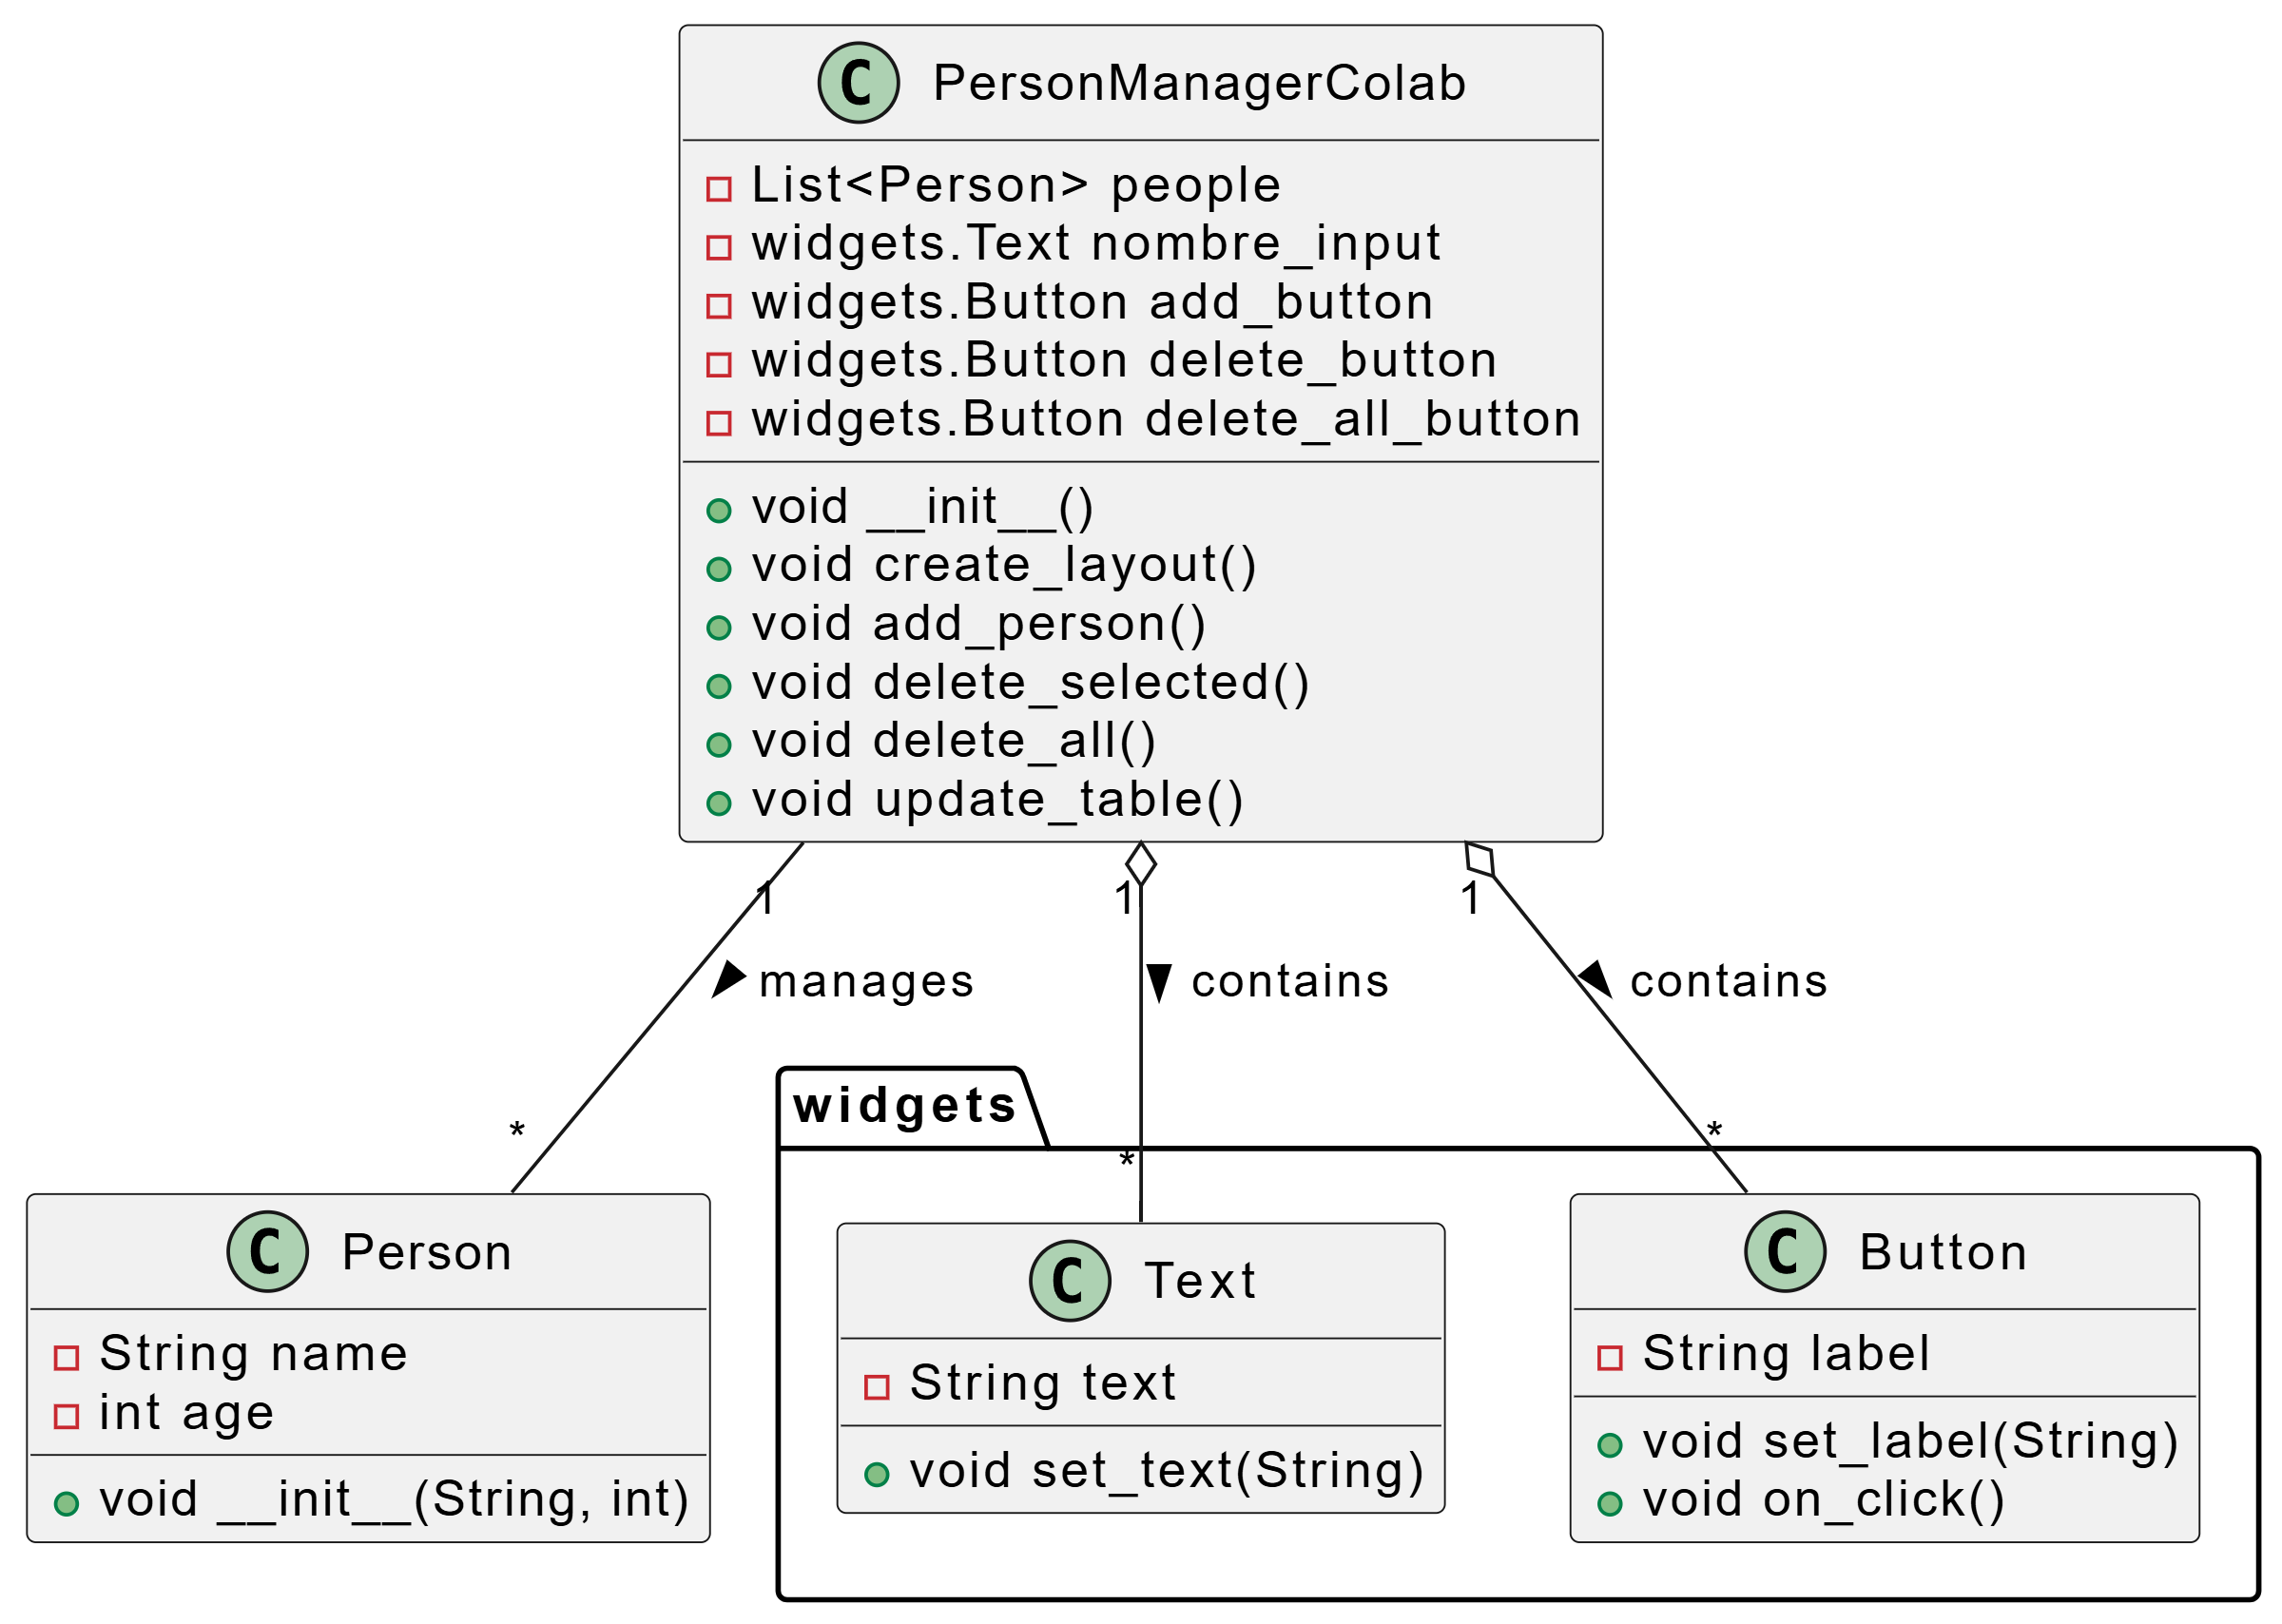

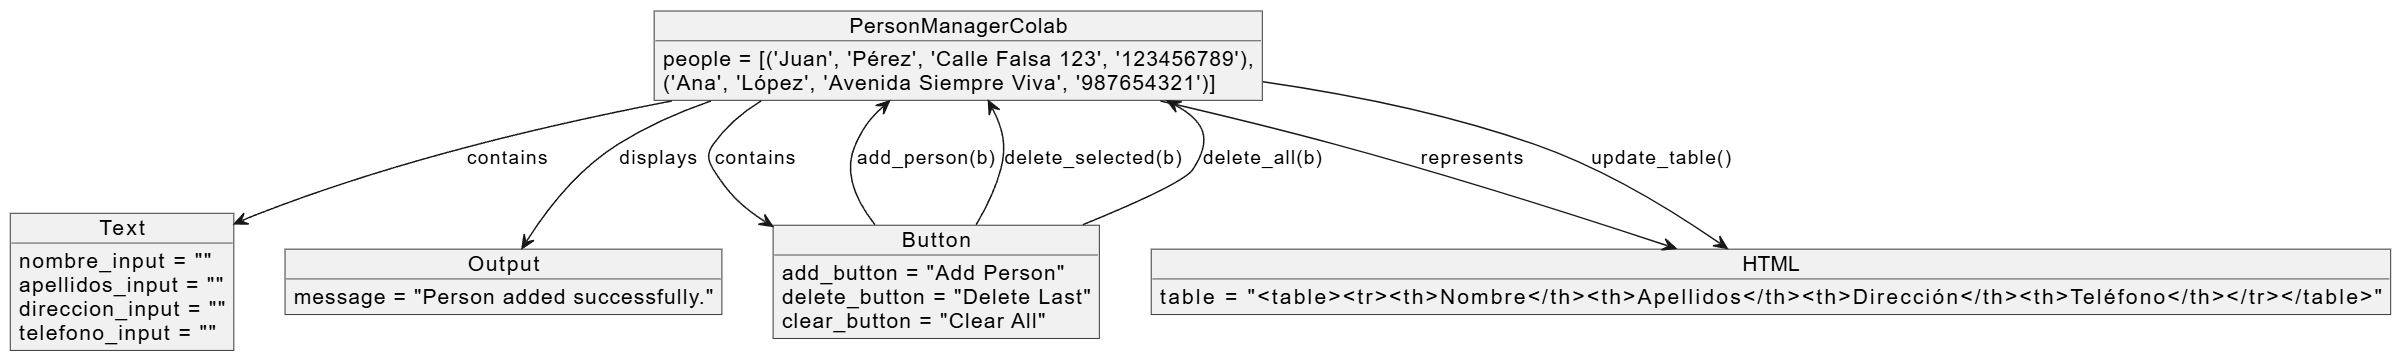

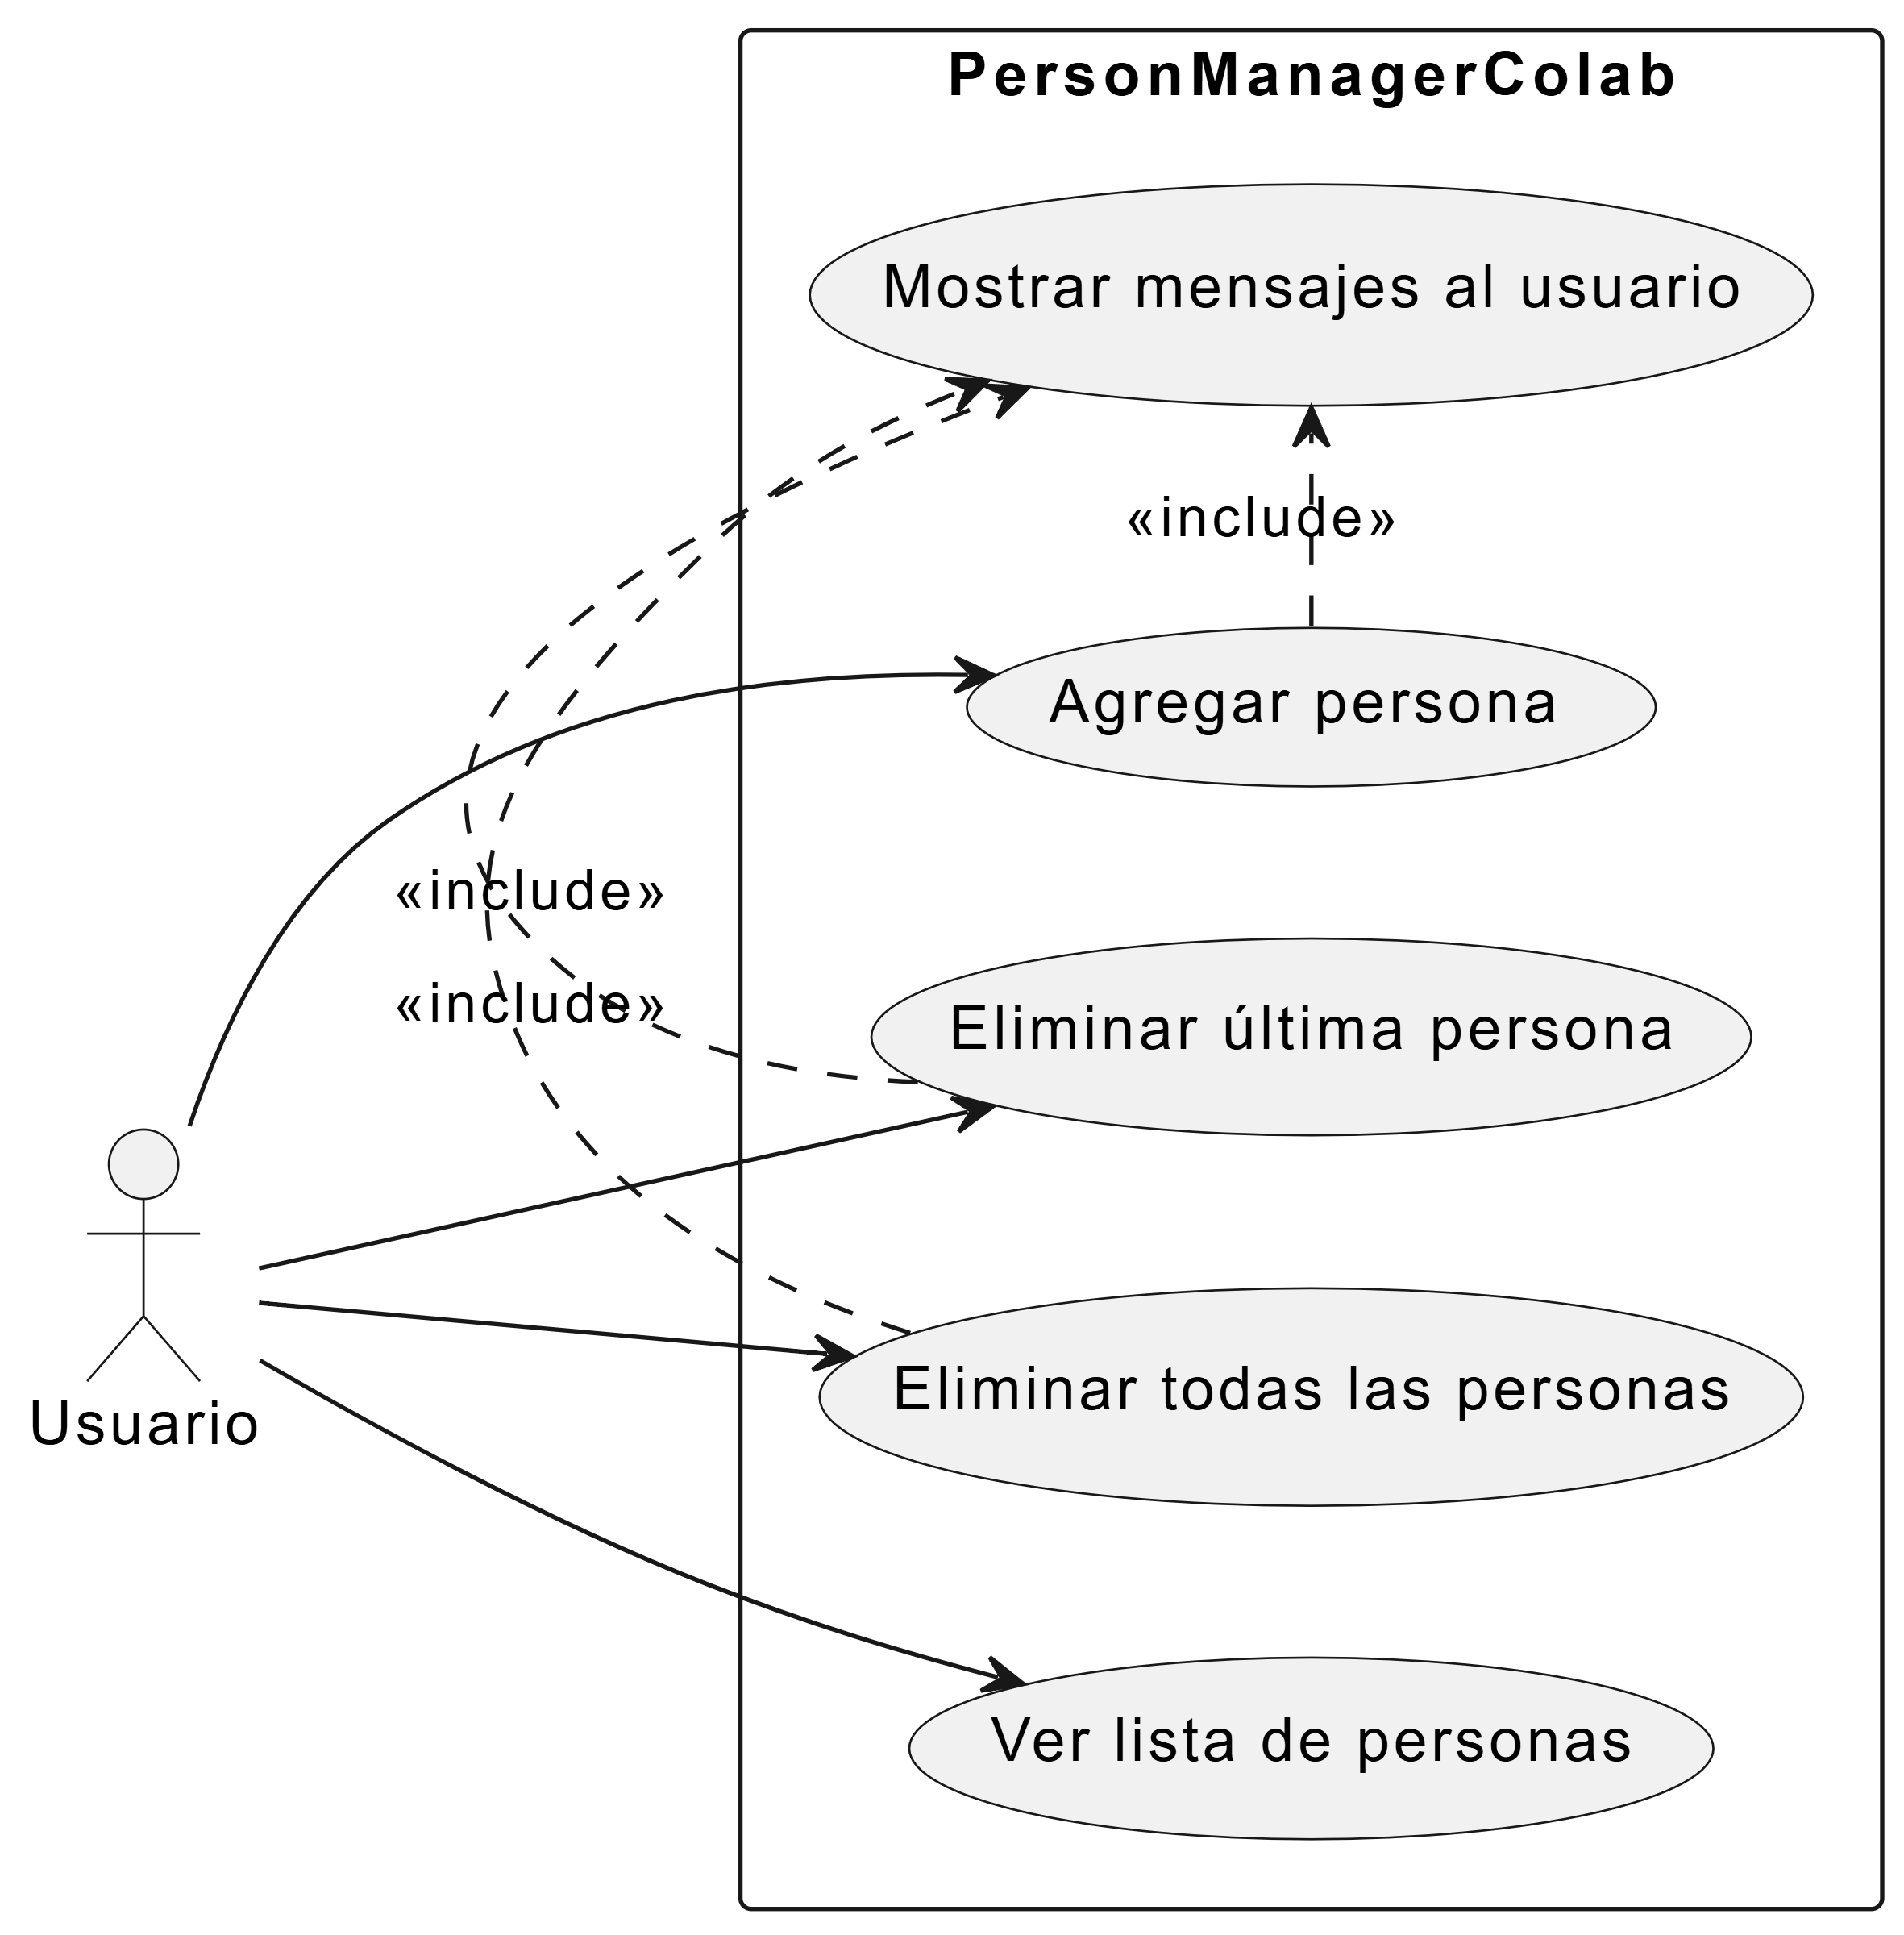